In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.animation as animation
from IPython.display import HTML
import optuna

from PSO import PSO
from Function import Function

PENALTY = 1000

%matplotlib inline

In [25]:
def plot_score(function_number, gb_record_list) : 
    turn_list = [i for i in range(1, len(gb_record_list) + 1)]
    score_list = []
    f = Function(function_number)
    for place in gb_record_list : 
        score_list.append(f(place[0]))

    plt.grid()
    plt.plot(turn_list, score_list)
    plt.show()

In [6]:
# パラメータ
N = 5   # 次元
function_number = 2
limit_time = N * 500   # 計算時間の制限
repeat_times = 3
output_mode = False   # 計算時間を短くしたいので、output_modeをFalseにしておく

# xの値域は自動化しておく
min_field_list = [-5.0, -5.0, -5.0, -600.0, -10.0, -5.0]
max_field_list = [5.0, 5.0, 10.0, 600.0, 10.0, 5.0]
min_field = min_field_list[function_number - 1]
max_field = max_field_list[function_number - 1]


# optunaに渡す関数
def objective(trial) : 
    num_agent = trial.suggest_int("num_agent", 20, 500)
    max_turn = trial.suggest_int("max_turn", 50, 500)
    w = trial.suggest_uniform("w", 0.0, 1.0)
    c1 = trial.suggest_uniform("c1", 0.0, 1.0)
    c2 = trial.suggest_uniform("c2", 0.0, 1.0)
    
    sum_score = 0.0   # これを最小化するのが目標
    for _ in range(repeat_times) :   # repeat_times回の合計をとる
        pso = PSO(N, function_number, num_agent, min_field, max_field, max_turn, 
                      w, c1, c2, output_mode = output_mode)
        
        sum_score += pso.gb_score

        if pso.calculation_time > limit_time :   # 時間制限を超えたら罰則を与える
            # 計算時間に応じて罰則を与えたほうが学習が早く進むはず？
            sum_score += PENALTY * pso.calculation_time / limit_time
            
    return sum_score


# optunaを使う
study = optuna.create_study()
study.optimize(objective, n_trials=100)

[I 2022-01-15 20:47:28,046] A new study created in memory with name: no-name-441f12d7-4913-40cd-a60e-d75240cf13af



------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 300, 'max_turn': 359, 'w': 0.2856163445493204, 'c1': 0.8935601686802033, 'c2': 0.7820395297528282}
gb_place : [ 7.12790695e-10 -9.94958637e-01  3.46466233e-09  9.94958640e-01
 -3.69286828e-09]
gb_score : 1.9899181141865832
計算時間 : 3017 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 300, 'max_turn': 359, 'w': 0.2856163445493204, 'c1': 0.8935601686802033, 'c2': 0.7820395297528282}
gb_place : [-1.93697416e-06  9.94959772e-01 -9.94958398e-01  9.94961529e-01
 -8.25165890e-07]
gb_score : 2.984877174083742
計算時間 : 3377 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 20:47:37,918] Trial 0 finished with value: 3911.344544593013 and parameters: {'num_agent': 300, 'max_turn': 359, 'w': 0.2856163445493204, 'c1': 0.8935601686802033, 'c2': 0.7820395297528282}. Best is trial 0 with value: 3911.344544593013.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 300, 'max_turn': 359, 'w': 0.2856163445493204, 'c1': 0.8935601686802033, 'c2': 0.7820395297528282}
gb_place : [ 9.94958646e-01 -3.84329812e-08  1.98991227e+00  2.80800622e-08
  9.94958565e-01]
gb_score : 5.969749304742487
計算時間 : 3357 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 25, 'max_turn': 201, 'w': 0.28544983650757416, 'c1': 0.002995252012463867, 'c2': 0.12915649268524532}
gb_place : [ 2.91972768 -1.0283629   0.04493309  1.01326882  1.97611991]
gb_score : 16.462662182412757
計算時間 : 170 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 20:47:38,432] Trial 1 finished with value: 42.1150659839637 and parameters: {'num_agent': 25, 'max_turn': 201, 'w': 0.28544983650757416, 'c1': 0.002995252012463867, 'c2': 0.12915649268524532}. Best is trial 1 with value: 42.1150659839637.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 25, 'max_turn': 201, 'w': 0.28544983650757416, 'c1': 0.002995252012463867, 'c2': 0.12915649268524532}
gb_place : [ 0.05674686 -0.8722992   1.97960307 -1.97406469  0.88418399]
gb_score : 15.787926886046934
計算時間 : 175 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 25, 'max_turn': 201, 'w': 0.28544983650757416, 'c1': 0.002995252012463867, 'c2': 0.12915649268524532}
gb_place : [1.02333313 1.94516601 0.92124663 0.96362377 1.0181803 ]
gb_score : 9.86447691550401
計算時間 : 159 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 52, 'max_turn': 102, 'w': 0.7356333434762157, 'c1': 0.8767227005483191, 'c2': 0.599032109391982}
gb_place : [ 9.94958

[I 2022-01-15 20:47:38,921] Trial 2 finished with value: 8.95462647616252 and parameters: {'num_agent': 52, 'max_turn': 102, 'w': 0.7356333434762157, 'c1': 0.8767227005483191, 'c2': 0.599032109391982}. Best is trial 2 with value: 8.95462647616252.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 52, 'max_turn': 102, 'w': 0.7356333434762157, 'c1': 0.8767227005483191, 'c2': 0.599032109391982}
gb_place : [ 3.89856843e-08 -1.22352986e-07 -9.94958772e-01 -1.49960428e-07
 -9.94958868e-01]
gb_score : 1.989918114208411
計算時間 : 157 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 232, 'max_turn': 356, 'w': 0.10416139310257311, 'c1': 0.22851907260914817, 'c2': 0.12237808030332409}
gb_place : [ 0.02408575 -0.01468358  0.03147717 -1.00566354  0.00191506]
gb_score : 1.3719682638494213
計算時間 : 2364 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 232, 'max_turn': 356, 'w': 0.10416139310257311, 'c1': 0.22851907260914817, 'c2': 0.12237808030

[I 2022-01-15 20:47:46,018] Trial 3 finished with value: 11.086581448371938 and parameters: {'num_agent': 232, 'max_turn': 356, 'w': 0.10416139310257311, 'c1': 0.22851907260914817, 'c2': 0.12237808030332409}. Best is trial 2 with value: 8.95462647616252.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 232, 'max_turn': 356, 'w': 0.10416139310257311, 'c1': 0.22851907260914817, 'c2': 0.12237808030332409}
gb_place : [-0.0163663   0.00614442  0.0759685  -1.00458911  0.08251746]
gb_score : 3.518473999538502
計算時間 : 2330 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 188, 'max_turn': 309, 'w': 0.9118409504748612, 'c1': 0.008916089165322605, 'c2': 0.8220457135697792}
gb_place : [-9.94959679e-01 -3.59305061e-06  7.15952282e-07  2.08445813e-06
  9.94959632e-01]
gb_score : 1.9899181181223238
計算時間 : 1637 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 188, 'max_turn': 309, 'w': 0.9118409504748612, 'c1': 0.008916089165322605, 'c2': 0.822045

[I 2022-01-15 20:47:50,983] Trial 4 finished with value: 8.954626547992476 and parameters: {'num_agent': 188, 'max_turn': 309, 'w': 0.9118409504748612, 'c1': 0.008916089165322605, 'c2': 0.8220457135697792}. Best is trial 2 with value: 8.95462647616252.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 188, 'max_turn': 309, 'w': 0.9118409504748612, 'c1': 0.008916089165322605, 'c2': 0.8220457135697792}
gb_place : [-4.30091603e-07 -5.94033702e-06  3.68721363e-06 -9.94956352e-01
 -1.98991698e+00]
gb_score : 4.9747902628859215
計算時間 : 1629 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 352, 'max_turn': 464, 'w': 0.15337276664191868, 'c1': 0.20611928500992238, 'c2': 0.4002163354723125}
gb_place : [-2.78450593e-06  1.19717371e-05 -9.94907001e-01 -5.76825057e-05
 -3.52964038e-06]
gb_score : 0.9949602783571336
計算時間 : 5458 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 352, 'max_turn': 464, 'w': 0.15337276664191868, 'c1': 0.206119285009

[I 2022-01-15 20:48:07,117] Trial 5 finished with value: 6402.565266524467 and parameters: {'num_agent': 352, 'max_turn': 464, 'w': 0.15337276664191868, 'c1': 0.20611928500992238, 'c2': 0.4002163354723125}. Best is trial 2 with value: 8.95462647616252.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 352, 'max_turn': 464, 'w': 0.15337276664191868, 'c1': 0.20611928500992238, 'c2': 0.4002163354723125}
gb_place : [ 5.97630427e-03 -1.55437722e-03 -1.00256419e+00 -4.06650693e-04
 -9.66606294e-01]
gb_score : 2.167671027434853
計算時間 : 5139 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 303, 'max_turn': 288, 'w': 0.6494613117819817, 'c1': 0.27766630050485597, 'c2': 0.8228517948590375}
gb_place : [ 9.94958636e-01 -9.94958637e-01  9.94958639e-01 -9.94958638e-01
  3.17234687e-10]
gb_score : 3.979836228373159
計算時間 : 2404 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 303, 'max_turn': 288, 'w': 0.6494613117819817, 'c1': 0.2776663005048559

[I 2022-01-15 20:48:14,681] Trial 6 finished with value: 2038.9445496280264 and parameters: {'num_agent': 303, 'max_turn': 288, 'w': 0.6494613117819817, 'c1': 0.27766630050485597, 'c2': 0.8228517948590375}. Best is trial 2 with value: 8.95462647616252.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 303, 'max_turn': 288, 'w': 0.6494613117819817, 'c1': 0.27766630050485597, 'c2': 0.8228517948590375}
gb_place : [-3.73804491e-09  9.94958638e-01 -9.94958636e-01  1.48121277e-09
 -9.94958638e-01]
gb_score : 2.9848771712798694
計算時間 : 2558 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 457, 'max_turn': 118, 'w': 0.4881690257485307, 'c1': 0.38879901702167796, 'c2': 0.6944823747503005}
gb_place : [ 1.98991223e+00  9.94958636e-01 -9.94958638e-01  9.94958640e-01
 -9.76351541e-10]
gb_score : 6.9647083618339565
計算時間 : 1577 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 457, 'max_turn': 118, 'w': 0.4881690257485307, 'c1': 0.388799017021677

[I 2022-01-15 20:48:19,429] Trial 7 finished with value: 17.909252952041072 and parameters: {'num_agent': 457, 'max_turn': 118, 'w': 0.4881690257485307, 'c1': 0.38879901702167796, 'c2': 0.6944823747503005}. Best is trial 2 with value: 8.95462647616252.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 457, 'max_turn': 118, 'w': 0.4881690257485307, 'c1': 0.38879901702167796, 'c2': 0.6944823747503005}
gb_place : [-9.94958637e-01 -4.02618261e-10 -9.94958636e-01  9.94958639e-01
 -9.94958637e-01]
gb_score : 3.979836228373159
計算時間 : 1558 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 330, 'max_turn': 314, 'w': 0.8332359051933138, 'c1': 0.41376149360502545, 'c2': 0.3227670585278841}
gb_place : [-0.99495864  0.99495864  0.99495864  1.98991223 -1.98991223]
gb_score : 10.944539552388042
計算時間 : 2935 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 330, 'max_turn': 314, 'w': 0.8332359051933138, 'c1': 0.41376149360502545, 'c2': 0.3227670585

[I 2022-01-15 20:48:28,376] Trial 8 finished with value: 3554.719334837854 and parameters: {'num_agent': 330, 'max_turn': 314, 'w': 0.8332359051933138, 'c1': 0.41376149360502545, 'c2': 0.3227670585278841}. Best is trial 2 with value: 8.95462647616252.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 330, 'max_turn': 314, 'w': 0.8332359051933138, 'c1': 0.41376149360502545, 'c2': 0.3227670585278841}
gb_place : [-9.94958639e-01  3.56233144e-09 -9.94958635e-01  1.51859102e-09
 -3.18923491e-11]
gb_score : 1.9899181141865796
計算時間 : 2944 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 413, 'max_turn': 223, 'w': 0.4238866325403292, 'c1': 0.054427175298133124, 'c2': 0.14778595671216244}
gb_place : [-6.55990811e-03  9.88431146e-01 -3.20122715e-03  4.01819879e-04
  9.80853041e-01]
gb_score : 2.048354859106233
計算時間 : 3109 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 413, 'max_turn': 223, 'w': 0.4238866325403292, 'c1': 0.05442717529813

[I 2022-01-15 20:48:37,605] Trial 9 finished with value: 3657.035648092635 and parameters: {'num_agent': 413, 'max_turn': 223, 'w': 0.4238866325403292, 'c1': 0.054427175298133124, 'c2': 0.14778595671216244}. Best is trial 2 with value: 8.95462647616252.
[I 2022-01-15 20:48:37,725] Trial 10 finished with value: 12.983506089727001 and parameters: {'num_agent': 22, 'max_turn': 54, 'w': 0.7182335664118397, 'c1': 0.8373305889858362, 'c2': 0.5980379267714363}. Best is trial 2 with value: 8.95462647616252.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 413, 'max_turn': 223, 'w': 0.4238866325403292, 'c1': 0.054427175298133124, 'c2': 0.14778595671216244}
gb_place : [-9.94976563e-01  3.70863207e-05  3.87034669e-05 -2.28750349e-05
  2.23928507e-05]
gb_score : 0.9949598941550644
計算時間 : 2888 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 22, 'max_turn': 54, 'w': 0.7182335664118397, 'c1': 0.8373305889858362, 'c2': 0.5980379267714363}
gb_place : [-9.92298133e-01  1.98875052e+00  1.04149014e-03  1.56336451e-03
 -9.94370873e-01]
gb_score : 5.972188353340735
計算時間 : 37 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 22, 'max_turn': 54, 'w': 0.7182335664118397, 'c1': 0.8373305889858362, 'c2

[I 2022-01-15 20:48:43,219] Trial 11 finished with value: 8.193698489507 and parameters: {'num_agent': 144, 'max_turn': 460, 'w': 0.9902348059835082, 'c1': 0.667704092565533, 'c2': 0.9418970930655325}. Best is trial 11 with value: 8.193698489507.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 144, 'max_turn': 460, 'w': 0.9902348059835082, 'c1': 0.667704092565533, 'c2': 0.9418970930655325}
gb_place : [-0.00132998  0.02271919 -0.98980424  1.01266681  0.01291043]
gb_score : 2.193003697874529
計算時間 : 1808 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 122, 'max_turn': 497, 'w': 0.9872257937185829, 'c1': 0.6757692000708332, 'c2': 0.9684946338886425}
gb_place : [ 9.96597669e-01 -2.51171926e-04 -9.94081208e-01  9.93612085e-01
 -9.92274220e-01]
gb_score : 3.9823222943103307
計算時間 : 1639 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 122, 'max_turn': 497, 'w': 0.9872257937185829, 'c1': 0.6757692000708332, 'c2': 0.96849463388864

[I 2022-01-15 20:48:48,255] Trial 12 finished with value: 12.95637113755026 and parameters: {'num_agent': 122, 'max_turn': 497, 'w': 0.9872257937185829, 'c1': 0.6757692000708332, 'c2': 0.9684946338886425}. Best is trial 11 with value: 8.193698489507.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 122, 'max_turn': 497, 'w': 0.9872257937185829, 'c1': 0.6757692000708332, 'c2': 0.9684946338886425}
gb_place : [ 1.9937173   0.99551965 -0.99285748 -0.00334692  0.99546568]
gb_score : 6.970787331289451
計算時間 : 1658 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 98, 'max_turn': 431, 'w': 0.7429265344892256, 'c1': 0.6927631833007787, 'c2': 0.9556970915733095}
gb_place : [-9.94958637e-01  9.94958637e-01 -9.94958636e-01 -8.82952533e-10
 -1.34510701e-09]
gb_score : 2.9848771712798694
計算時間 : 1290 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 98, 'max_turn': 431, 'w': 0.7429265344892256, 'c1': 0.6927631833007787, 'c2': 0.955697091573309

[I 2022-01-15 20:48:51,955] Trial 13 finished with value: 13.929416723667913 and parameters: {'num_agent': 98, 'max_turn': 431, 'w': 0.7429265344892256, 'c1': 0.6927631833007787, 'c2': 0.9556970915733095}. Best is trial 11 with value: 8.193698489507.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 98, 'max_turn': 431, 'w': 0.7429265344892256, 'c1': 0.6927631833007787, 'c2': 0.9556970915733095}
gb_place : [-4.05475097e-09  1.98991223e+00 -3.29787924e-10  3.39373443e-10
  1.43784885e-09]
gb_score : 3.979831190554087
計算時間 : 1170 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 122, 'max_turn': 57, 'w': 0.9802457040071215, 'c1': 0.9960855942494263, 'c2': 0.5251466815262569}
gb_place : [-1.00067609e+00  4.02614040e-04 -9.95627179e-01  2.69130747e-03
  9.83691884e-01]
gb_score : 3.018060817468232
計算時間 : 197 ms


------------------------------ PSO SIMULATION START!! ------------------------------



[I 2022-01-15 20:48:52,578] Trial 14 finished with value: 10.145771155418192 and parameters: {'num_agent': 122, 'max_turn': 57, 'w': 0.9802457040071215, 'c1': 0.9960855942494263, 'c2': 0.5251466815262569}. Best is trial 11 with value: 8.193698489507.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 122, 'max_turn': 57, 'w': 0.9802457040071215, 'c1': 0.9960855942494263, 'c2': 0.5251466815262569}
gb_place : [-9.96510608e-01 -9.79128022e-01  1.00796259e+00  5.68299534e-04
 -1.38877504e-02]
gb_score : 3.106801916186688
計算時間 : 207 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 122, 'max_turn': 57, 'w': 0.9802457040071215, 'c1': 0.9960855942494263, 'c2': 0.5251466815262569}
gb_place : [-0.98964997 -0.99408021  0.01308891  0.99243868  0.99423082]
gb_score : 4.020908421763272
計算時間 : 197 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 55, 'max_turn': 151, 'w': 0.6109807528967397, 'c1': 0.6406297753080681, 'c2': 0.9978270758559038}
g

[I 2022-01-15 20:48:53,390] Trial 15 finished with value: 14.924380818580282 and parameters: {'num_agent': 55, 'max_turn': 151, 'w': 0.6109807528967397, 'c1': 0.6406297753080681, 'c2': 0.9978270758559038}. Best is trial 11 with value: 8.193698489507.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 55, 'max_turn': 151, 'w': 0.6109807528967397, 'c1': 0.6406297753080681, 'c2': 0.9978270758559038}
gb_place : [-0.99495864  0.99495864 -0.99495864  0.99495864 -1.98991223]
gb_score : 7.9596674189272445
計算時間 : 257 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 184, 'max_turn': 403, 'w': 0.8454837423659463, 'c1': 0.8018608113774679, 'c2': 0.31705288230282225}
gb_place : [-9.94958638e-01  3.16968567e-09 -9.94958636e-01  9.94958638e-01
  1.47218618e-09]
gb_score : 2.9848771712798694
計算時間 : 2277 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 184, 'max_turn': 403, 'w': 0.8454837423659463, 'c1': 0.8018608113774679, 'c2': 0.3170528823028

[I 2022-01-15 20:49:00,087] Trial 16 finished with value: 6.964713399653029 and parameters: {'num_agent': 184, 'max_turn': 403, 'w': 0.8454837423659463, 'c1': 0.8018608113774679, 'c2': 0.31705288230282225}. Best is trial 16 with value: 6.964713399653029.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 184, 'max_turn': 403, 'w': 0.8454837423659463, 'c1': 0.8018608113774679, 'c2': 0.31705288230282225}
gb_place : [ 9.94958637e-01 -3.44261542e-09 -9.94958639e-01 -7.75462374e-11
  9.94958637e-01]
gb_score : 2.9848771712798694
計算時間 : 2237 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 188, 'max_turn': 411, 'w': 0.8687769781073245, 'c1': 0.5456120119461514, 'c2': 0.27589918359078364}
gb_place : [ 3.53111565e-09 -1.39623812e-09 -2.97913329e-09 -1.04699760e-09
  9.94958637e-01]
gb_score : 0.9949590570932898
計算時間 : 2299 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 188, 'max_turn': 411, 'w': 0.8687769781073245, 'c1': 0.545612011946151

[I 2022-01-15 20:49:06,990] Trial 17 finished with value: 3.979836228373159 and parameters: {'num_agent': 188, 'max_turn': 411, 'w': 0.8687769781073245, 'c1': 0.5456120119461514, 'c2': 0.27589918359078364}. Best is trial 17 with value: 3.979836228373159.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 188, 'max_turn': 411, 'w': 0.8687769781073245, 'c1': 0.5456120119461514, 'c2': 0.27589918359078364}
gb_place : [-2.22349760e-09 -2.97810491e-10 -9.94958637e-01  1.50142360e-09
  4.44426514e-10]
gb_score : 0.9949590570932898
計算時間 : 2294 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 226, 'max_turn': 393, 'w': 0.8583461579710887, 'c1': 0.5414374568987649, 'c2': 0.27124096975991496}
gb_place : [-9.94958637e-01  9.94958636e-01 -4.71230349e-10 -7.51658410e-10
 -1.32354734e-09]
gb_score : 1.9899181141865796
計算時間 : 2535 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 226, 'max_turn': 393, 'w': 0.8583461579710887, 'c1': 0.541437456898764

[I 2022-01-15 20:49:14,804] Trial 18 finished with value: 3101.1495855331136 and parameters: {'num_agent': 226, 'max_turn': 393, 'w': 0.8583461579710887, 'c1': 0.5414374568987649, 'c2': 0.27124096975991496}. Best is trial 17 with value: 3.979836228373159.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 226, 'max_turn': 393, 'w': 0.8583461579710887, 'c1': 0.5414374568987649, 'c2': 0.27124096975991496}
gb_place : [ 9.94958637e-01  2.71371134e-09  1.98991223e+00 -2.48746556e-10
  1.11311918e-09]
gb_score : 4.974790247647377
計算時間 : 2574 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 172, 'max_turn': 408, 'w': 0.8289914513666671, 'c1': 0.7890458244763223, 'c2': 0.024275496551646403}
gb_place : [-0.98226376 -0.95790274  0.98507027  2.00276664 -1.90701012]
gb_score : 12.614696314965228
計算時間 : 1958 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 172, 'max_turn': 408, 'w': 0.8289914513666671, 'c1': 0.7890458244763223, 'c2': 0.0242754965

[I 2022-01-15 20:49:20,852] Trial 19 finished with value: 45.50606233087012 and parameters: {'num_agent': 172, 'max_turn': 408, 'w': 0.8289914513666671, 'c1': 0.7890458244763223, 'c2': 0.024275496551646403}. Best is trial 17 with value: 3.979836228373159.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 172, 'max_turn': 408, 'w': 0.8289914513666671, 'c1': 0.7890458244763223, 'c2': 0.024275496551646403}
gb_place : [-1.90042393  2.0563974  -1.00670632  1.9026897   0.03538404]
gb_score : 17.057473681826266
計算時間 : 2002 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 250, 'max_turn': 496, 'w': 0.5806791864460363, 'c1': 0.5457645873579259, 'c2': 0.4054994205183642}
gb_place : [-3.10112576e-09  1.98991223e+00  2.94430921e-09  4.45348745e-10
 -9.94958637e-01]
gb_score : 4.974790247647377
計算時間 : 3467 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 250, 'max_turn': 496, 'w': 0.5806791864460363, 'c1': 0.5457645873579259, 'c2': 0.40549942051

[I 2022-01-15 20:49:31,428] Trial 20 finished with value: 4194.134457666574 and parameters: {'num_agent': 250, 'max_turn': 496, 'w': 0.5806791864460363, 'c1': 0.5457645873579259, 'c2': 0.4054994205183642}. Best is trial 17 with value: 3.979836228373159.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 250, 'max_turn': 496, 'w': 0.5806791864460363, 'c1': 0.5457645873579259, 'c2': 0.4054994205183642}
gb_place : [ 3.81402660e-09  2.82682427e-09 -1.98991223e+00 -9.94958637e-01
 -9.94958638e-01]
gb_score : 5.969749304740667
計算時間 : 3420 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 174, 'max_turn': 458, 'w': 0.9927139579186419, 'c1': 0.7461297812454729, 'c2': 0.3172733348306495}
gb_place : [-0.99583881  0.99373188 -0.98876841 -0.00175153  0.99541567]
gb_score : 3.98853260660902
計算時間 : 2161 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 174, 'max_turn': 458, 'w': 0.9927139579186419, 'c1': 0.7461297812454729, 'c2': 0.317273334830649

[I 2022-01-15 20:49:38,003] Trial 21 finished with value: 10.957200639234845 and parameters: {'num_agent': 174, 'max_turn': 458, 'w': 0.9927139579186419, 'c1': 0.7461297812454729, 'c2': 0.3172733348306495}. Best is trial 17 with value: 3.979836228373159.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 174, 'max_turn': 458, 'w': 0.9927139579186419, 'c1': 0.7461297812454729, 'c2': 0.3172733348306495}
gb_place : [-0.99721417 -0.00121913 -0.0014815   0.99312621 -0.00190749]
gb_score : 1.9930449353551207
計算時間 : 2143 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 147, 'max_turn': 372, 'w': 0.9096000687231128, 'c1': 0.9834287500689072, 'c2': 0.21962603664410674}
gb_place : [-1.82999977e-07 -9.94957767e-01  9.94959137e-01 -9.94958777e-01
  5.57531707e-07]
gb_score : 2.984877171551627
計算時間 : 1516 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 147, 'max_turn': 372, 'w': 0.9096000687231128, 'c1': 0.9834287500689072, 'c2': 0.219626036644

[I 2022-01-15 20:49:42,599] Trial 22 finished with value: 7.959675820791043 and parameters: {'num_agent': 147, 'max_turn': 372, 'w': 0.9096000687231128, 'c1': 0.9834287500689072, 'c2': 0.21962603664410674}. Best is trial 17 with value: 3.979836228373159.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 147, 'max_turn': 372, 'w': 0.9096000687231128, 'c1': 0.9834287500689072, 'c2': 0.21962603664410674}
gb_place : [-9.94846512e-01  3.41317290e-05  9.94945023e-01 -5.48988974e-05
 -9.94953611e-01]
gb_score : 2.9848805350524756
計算時間 : 1508 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 215, 'max_turn': 355, 'w': 0.9056549007447822, 'c1': 0.9876775162806167, 'c2': 0.2261100444854763}
gb_place : [ 9.94958664e-01 -9.94958663e-01  9.94958654e-01 -3.55617227e-08
 -9.94958640e-01]
gb_score : 3.979836228373724
計算時間 : 2100 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 215, 'max_turn': 355, 'w': 0.9056549007447822, 'c1': 0.9876775162806167,

[I 2022-01-15 20:49:48,981] Trial 23 finished with value: 6.964713403764993 and parameters: {'num_agent': 215, 'max_turn': 355, 'w': 0.9056549007447822, 'c1': 0.9876775162806167, 'c2': 0.2261100444854763}. Best is trial 17 with value: 3.979836228373159.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 215, 'max_turn': 355, 'w': 0.9056549007447822, 'c1': 0.9876775162806167, 'c2': 0.2261100444854763}
gb_place : [-5.83541248e-07 -1.71312038e-06 -3.89024869e-07 -1.79492999e-06
  9.94961709e-01]
gb_score : 0.9949590602828593
計算時間 : 2105 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 211, 'max_turn': 337, 'w': 0.7914083126723218, 'c1': 0.9579773325391748, 'c2': 0.008114779816133871}
gb_place : [ 0.70819082 -0.9294249   1.06781855 -1.04674926 -0.16483858]
gb_score : 23.415856143206348
計算時間 : 1929 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 211, 'max_turn': 337, 'w': 0.7914083126723218, 'c1': 0.9579773325391748, 'c2': 0.0081147798

[I 2022-01-15 20:49:54,834] Trial 24 finished with value: 64.18441484568903 and parameters: {'num_agent': 211, 'max_turn': 337, 'w': 0.7914083126723218, 'c1': 0.9579773325391748, 'c2': 0.008114779816133871}. Best is trial 17 with value: 3.979836228373159.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 211, 'max_turn': 337, 'w': 0.7914083126723218, 'c1': 0.9579773325391748, 'c2': 0.008114779816133871}
gb_place : [0.88956655 0.91509175 1.0655932  1.9583321  2.19252558]
gb_score : 22.753183007924104
計算時間 : 1925 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 258, 'max_turn': 255, 'w': 0.9064726365367223, 'c1': 0.5853980920324218, 'c2': 0.4206948562889573}
gb_place : [-6.69231172e-07 -9.94958850e-01  9.94958983e-01 -9.94959260e-01
  9.94958741e-01]
gb_score : 3.9798362285737063
計算時間 : 1783 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 258, 'max_turn': 255, 'w': 0.9064726365367223, 'c1': 0.5853980920324218, 'c2': 0.420694856288957

[I 2022-01-15 20:50:00,298] Trial 25 finished with value: 3.9798362286088285 and parameters: {'num_agent': 258, 'max_turn': 255, 'w': 0.9064726365367223, 'c1': 0.5853980920324218, 'c2': 0.4206948562889573}. Best is trial 17 with value: 3.979836228373159.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 258, 'max_turn': 255, 'w': 0.9064726365367223, 'c1': 0.5853980920324218, 'c2': 0.4206948562889573}
gb_place : [ 8.68940307e-08  1.03764784e-07 -2.19490299e-08  3.56507229e-07
  8.75352460e-08]
gb_score : 3.0464519795714295e-11
計算時間 : 1812 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 279, 'max_turn': 237, 'w': 0.692278510945475, 'c1': 0.4649493231993653, 'c2': 0.4293611797200972}
gb_place : [-9.94958640e-01 -2.18792037e-10  9.94958638e-01  6.30193313e-10
  1.98991223e+00]
gb_score : 5.969749304740665
計算時間 : 1832 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 279, 'max_turn': 237, 'w': 0.692278510945475, 'c1': 0.4649493231993653

[I 2022-01-15 20:50:05,879] Trial 26 finished with value: 13.929416723667911 and parameters: {'num_agent': 279, 'max_turn': 237, 'w': 0.692278510945475, 'c1': 0.4649493231993653, 'c2': 0.4293611797200972}. Best is trial 17 with value: 3.979836228373159.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 279, 'max_turn': 237, 'w': 0.692278510945475, 'c1': 0.4649493231993653, 'c2': 0.4293611797200972}
gb_place : [ 1.51711917e-09 -2.42209440e-10  9.94958638e-01  1.44739482e-10
  9.94958638e-01]
gb_score : 1.9899181141865796
計算時間 : 1841 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 381, 'max_turn': 266, 'w': 0.9034613240650176, 'c1': 0.5783877205911185, 'c2': 0.484797243337336}
gb_place : [ 9.94958699e-01  3.81968628e-07  9.94958724e-01 -1.27426095e-08
 -4.84810969e-08]
gb_score : 1.9899181142182698
計算時間 : 2768 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 381, 'max_turn': 266, 'w': 0.9034613240650176, 'c1': 0.5783877205911185, '

[I 2022-01-15 20:50:14,342] Trial 27 finished with value: 3349.754626476105 and parameters: {'num_agent': 381, 'max_turn': 266, 'w': 0.9034613240650176, 'c1': 0.5783877205911185, 'c2': 0.484797243337336}. Best is trial 17 with value: 3.979836228373159.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 381, 'max_turn': 266, 'w': 0.9034613240650176, 'c1': 0.5783877205911185, 'c2': 0.484797243337336}
gb_place : [-5.78723664e-08  1.98991225e+00 -9.94958642e-01  1.13499995e-08
  9.94958569e-01]
gb_score : 5.969749304742383
計算時間 : 2821 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 277, 'max_turn': 178, 'w': 0.7848475318470649, 'c1': 0.607750573814074, 'c2': 0.3425463196547494}
gb_place : [-2.14131860e-10  9.94958638e-01  9.94958635e-01 -7.46582855e-10
 -7.40146907e-10]
gb_score : 1.9899181141865796
計算時間 : 1402 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 277, 'max_turn': 178, 'w': 0.7848475318470649, 'c1': 0.607750573814074, 'c2

[I 2022-01-15 20:50:18,563] Trial 28 finished with value: 6.964713399653029 and parameters: {'num_agent': 277, 'max_turn': 178, 'w': 0.7848475318470649, 'c1': 0.607750573814074, 'c2': 0.3425463196547494}. Best is trial 17 with value: 3.979836228373159.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 277, 'max_turn': 178, 'w': 0.7848475318470649, 'c1': 0.607750573814074, 'c2': 0.3425463196547494}
gb_place : [9.94958639e-01 8.73607889e-11 1.23817839e-09 6.94123446e-10
 1.45858978e-09]
gb_score : 0.9949590570932898
計算時間 : 1363 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 294, 'max_turn': 198, 'w': 0.561441810997312, 'c1': 0.4819030748676016, 'c2': 0.4833433380486683}
gb_place : [-3.07540313e-09 -9.94958638e-01 -4.42880204e-10 -9.94958638e-01
  1.60646127e-09]
gb_score : 1.9899181141865796
計算時間 : 1621 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 294, 'max_turn': 198, 'w': 0.561441810997312, 'c1': 0.4819030748676016, 'c2': 0

[I 2022-01-15 20:50:23,658] Trial 29 finished with value: 11.939503647300405 and parameters: {'num_agent': 294, 'max_turn': 198, 'w': 0.561441810997312, 'c1': 0.4819030748676016, 'c2': 0.4833433380486683}. Best is trial 17 with value: 3.979836228373159.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 294, 'max_turn': 198, 'w': 0.561441810997312, 'c1': 0.4819030748676016, 'c2': 0.4833433380486683}
gb_place : [-9.94958637e-01  9.94958640e-01 -9.94958639e-01 -9.94958638e-01
 -6.33981889e-10]
gb_score : 3.979836228373159
計算時間 : 1734 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 85, 'max_turn': 260, 'w': 0.33138313935898245, 'c1': 0.7346581992125127, 'c2': 0.5750281727309592}
gb_place : [ 9.93496706e-01 -2.77646011e-03  2.78133426e-03 -2.37724519e-03
  1.49425097e-05]
gb_score : 0.999568009103033
計算時間 : 728 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 85, 'max_turn': 260, 'w': 0.33138313935898245, 'c1': 0.7346581992125127, 'c2

[I 2022-01-15 20:50:25,851] Trial 30 finished with value: 11.984472045480192 and parameters: {'num_agent': 85, 'max_turn': 260, 'w': 0.33138313935898245, 'c1': 0.7346581992125127, 'c2': 0.5750281727309592}. Best is trial 17 with value: 3.979836228373159.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 85, 'max_turn': 260, 'w': 0.33138313935898245, 'c1': 0.7346581992125127, 'c2': 0.5750281727309592}
gb_place : [ 0.99682676  0.99065181  0.99651684 -0.00394977 -0.99219034]
gb_score : 3.9893008400442334
計算時間 : 699 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 258, 'max_turn': 163, 'w': 0.782258904138277, 'c1': 0.5995457845225927, 'c2': 0.3479326996724972}
gb_place : [-7.03142210e-10  1.98991224e+00 -1.54241987e-09 -9.94958637e-01
  9.94958637e-01]
gb_score : 5.969749304740667
計算時間 : 1191 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 258, 'max_turn': 163, 'w': 0.782258904138277, 'c1': 0.5995457845225927, 'c2': 0.3479326996724972

[I 2022-01-15 20:50:29,474] Trial 31 finished with value: 10.944544590207116 and parameters: {'num_agent': 258, 'max_turn': 163, 'w': 0.782258904138277, 'c1': 0.5995457845225927, 'c2': 0.3479326996724972}. Best is trial 17 with value: 3.979836228373159.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 258, 'max_turn': 163, 'w': 0.782258904138277, 'c1': 0.5995457845225927, 'c2': 0.3479326996724972}
gb_place : [-4.84446216e-09  9.94958638e-01 -9.94958636e-01  7.63249276e-10
  9.94958637e-01]
gb_score : 2.9848771712798694
計算時間 : 1187 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 326, 'max_turn': 168, 'w': 0.858169894390978, 'c1': 0.3701517587187019, 'c2': 0.18875672203726548}
gb_place : [ 5.64633042e-06  9.94954887e-01 -3.84047402e-06  4.31085411e-07
  5.52328659e-06]
gb_score : 0.9949590752230648
計算時間 : 1491 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 326, 'max_turn': 168, 'w': 0.858169894390978, 'c1': 0.3701517587187019, '

[I 2022-01-15 20:50:34,079] Trial 32 finished with value: 3.9798383371997534 and parameters: {'num_agent': 326, 'max_turn': 168, 'w': 0.858169894390978, 'c1': 0.3701517587187019, 'c2': 0.18875672203726548}. Best is trial 17 with value: 3.979836228373159.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 326, 'max_turn': 168, 'w': 0.858169894390978, 'c1': 0.3701517587187019, 'c2': 0.18875672203726548}
gb_place : [-9.94958560e-01  4.75351449e-08 -4.21712463e-08  8.35231930e-08
  3.67564823e-08]
gb_score : 0.9949590570969313
計算時間 : 1522 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 320, 'max_turn': 181, 'w': 0.9548775598845751, 'c1': 0.3514836149498081, 'c2': 0.1788905286636396}
gb_place : [ 5.92962233e-05  1.82878659e-04  9.94798986e-01 -8.11859523e-05
  9.94990728e-01]
gb_score : 1.9899320128823152
計算時間 : 1575 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 320, 'max_turn': 181, 'w': 0.9548775598845751, 'c1': 0.3514836149498081,

[I 2022-01-15 20:50:38,905] Trial 33 finished with value: 8.954820691514714 and parameters: {'num_agent': 320, 'max_turn': 181, 'w': 0.9548775598845751, 'c1': 0.3514836149498081, 'c2': 0.1788905286636396}. Best is trial 17 with value: 3.979836228373159.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 320, 'max_turn': 181, 'w': 0.9548775598845751, 'c1': 0.3514836149498081, 'c2': 0.1788905286636396}
gb_place : [ 4.08486786e-04  3.02313031e-04 -9.94808921e-01  9.95600140e-01
  1.62548595e-04]
gb_score : 1.990060642328734
計算時間 : 1578 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 362, 'max_turn': 123, 'w': 0.859901122400467, 'c1': 0.4447210183263359, 'c2': 0.11154255662386044}
gb_place : [ 8.46645702e-07  9.94960689e-01 -2.19495914e-06 -2.12159593e-06
  9.94960932e-01]
gb_score : 1.9899181180559697
計算時間 : 1218 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 362, 'max_turn': 123, 'w': 0.859901122400467, 'c1': 0.4447210183263359, '

[I 2022-01-15 20:50:42,650] Trial 34 finished with value: 6.964743769194014 and parameters: {'num_agent': 362, 'max_turn': 123, 'w': 0.859901122400467, 'c1': 0.4447210183263359, 'c2': 0.11154255662386044}. Best is trial 17 with value: 3.979836228373159.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 362, 'max_turn': 123, 'w': 0.859901122400467, 'c1': 0.4447210183263359, 'c2': 0.11154255662386044}
gb_place : [-9.94851180e-01 -3.24740124e-05  9.94753731e-01 -9.95242876e-01
 -9.94872952e-01]
gb_score : 3.979864529361489
計算時間 : 1234 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 273, 'max_turn': 87, 'w': 0.6615760376249806, 'c1': 0.3256332697056028, 'c2': 0.24284654757249396}
gb_place : [-9.94958650e-01 -9.94958656e-01 -9.94958612e-01 -5.35768416e-09
 -1.26668215e-08]
gb_score : 2.9848771712801483
計算時間 : 694 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 273, 'max_turn': 87, 'w': 0.6615760376249806, 'c1': 0.3256332697056028, 'c

[I 2022-01-15 20:50:44,817] Trial 35 finished with value: 7.95967245674664 and parameters: {'num_agent': 273, 'max_turn': 87, 'w': 0.6615760376249806, 'c1': 0.3256332697056028, 'c2': 0.24284654757249396}. Best is trial 17 with value: 3.979836228373159.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 273, 'max_turn': 87, 'w': 0.6615760376249806, 'c1': 0.3256332697056028, 'c2': 0.24284654757249396}
gb_place : [-9.94958635e-01 -3.09488381e-09  9.94958638e-01  9.94958640e-01
  9.94958644e-01]
gb_score : 3.9798362283731805
計算時間 : 702 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 409, 'max_turn': 242, 'w': 0.766247053229883, 'c1': 0.5321370135572722, 'c2': 0.05935577239993478}
gb_place : [-0.92167914  0.98198948  0.98620431  0.03510563  0.01640205]
gb_score : 4.371336377105315
計算時間 : 2778 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 409, 'max_turn': 242, 'w': 0.766247053229883, 'c1': 0.5321370135572722, 'c2': 0.059355772399934

[I 2022-01-15 20:50:53,201] Trial 36 finished with value: 3329.9665382052617 and parameters: {'num_agent': 409, 'max_turn': 242, 'w': 0.766247053229883, 'c1': 0.5321370135572722, 'c2': 0.05935577239993478}. Best is trial 17 with value: 3.979836228373159.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 409, 'max_turn': 242, 'w': 0.766247053229883, 'c1': 0.5321370135572722, 'c2': 0.05935577239993478}
gb_place : [-0.16402087  0.07160514  0.00607974  0.94920341 -0.06207304]
gb_score : 8.052054951802093
計算時間 : 2712 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 189, 'max_turn': 308, 'w': 0.8635938924560022, 'c1': 0.18721674265415664, 'c2': 0.2925203755516755}
gb_place : [ 1.46113586e-09  1.85817221e-09  1.40776621e-09 -9.94958637e-01
  9.94958638e-01]
gb_score : 1.9899181141865796
計算時間 : 1601 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 189, 'max_turn': 308, 'w': 0.8635938924560022, 'c1': 0.18721674265415664, 'c2': 0.29252037555

[I 2022-01-15 20:50:58,067] Trial 37 finished with value: 9.949585533113826 and parameters: {'num_agent': 189, 'max_turn': 308, 'w': 0.8635938924560022, 'c1': 0.18721674265415664, 'c2': 0.2925203755516755}. Best is trial 17 with value: 3.979836228373159.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 189, 'max_turn': 308, 'w': 0.8635938924560022, 'c1': 0.18721674265415664, 'c2': 0.2925203755516755}
gb_place : [-9.94958636e-01 -2.95128378e-09  1.93266457e-09 -1.58210624e-09
 -1.98991223e+00]
gb_score : 4.974790247647376
計算時間 : 1601 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 239, 'max_turn': 425, 'w': 0.8179295846537377, 'c1': 0.8810425736902312, 'c2': 0.3762570209703309}
gb_place : [-4.14371829e-09  9.94958639e-01 -9.94958638e-01 -1.54947740e-09
  4.30896896e-10]
gb_score : 1.9899181141865796
計算時間 : 2802 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 239, 'max_turn': 425, 'w': 0.8179295846537377, 'c1': 0.8810425736902312,

[I 2022-01-15 20:51:06,626] Trial 38 finished with value: 3386.974795285466 and parameters: {'num_agent': 239, 'max_turn': 425, 'w': 0.8179295846537377, 'c1': 0.8810425736902312, 'c2': 0.3762570209703309}. Best is trial 17 with value: 3.979836228373159.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 239, 'max_turn': 425, 'w': 0.8179295846537377, 'c1': 0.8810425736902312, 'c2': 0.3762570209703309}
gb_place : [-9.94958640e-01  9.94958637e-01  7.54272183e-10 -1.29859723e-09
 -8.91198543e-10]
gb_score : 1.9899181141865796
計算時間 : 2869 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 328, 'max_turn': 209, 'w': 0.9399904118256674, 'c1': 0.2840446969055858, 'c2': 0.6746772435772224}
gb_place : [-9.94994904e-01  3.30244484e-05 -9.94956395e-01  1.98990712e+00
  5.16458340e-05]
gb_score : 5.969750317272984
計算時間 : 1847 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 328, 'max_turn': 209, 'w': 0.9399904118256674, 'c1': 0.2840446969055858, 

[I 2022-01-15 20:51:12,289] Trial 39 finished with value: 13.93490543895777 and parameters: {'num_agent': 328, 'max_turn': 209, 'w': 0.9399904118256674, 'c1': 0.2840446969055858, 'c2': 0.6746772435772224}. Best is trial 17 with value: 3.979836228373159.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 328, 'max_turn': 209, 'w': 0.9399904118256674, 'c1': 0.2840446969055858, 'c2': 0.6746772435772224}
gb_place : [ 9.95776511e-01  3.63919381e-03 -2.25857159e-03 -5.67971762e-04
 -2.88288446e-03]
gb_score : 1.0004438490233802
計算時間 : 1907 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 295, 'max_turn': 155, 'w': 0.6888734018877114, 'c1': 0.6217629577975344, 'c2': 0.17278676849738156}
gb_place : [ 2.91094029e-03  2.30285655e-03 -4.40147099e-04 -8.70648355e-04
 -9.95977333e-01]
gb_score : 0.9980867955987218
計算時間 : 1258 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 295, 'max_turn': 155, 'w': 0.6888734018877114, 'c1': 0.6217629577975344

[I 2022-01-15 20:51:16,137] Trial 40 finished with value: 3.4244940244052646 and parameters: {'num_agent': 295, 'max_turn': 155, 'w': 0.6888734018877114, 'c1': 0.6217629577975344, 'c2': 0.17278676849738156}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 295, 'max_turn': 155, 'w': 0.6888734018877114, 'c1': 0.6217629577975344, 'c2': 0.17278676849738156}
gb_place : [ 5.63565689e-05  2.11256161e-04  9.94807219e-01  2.37665070e-04
 -6.35869393e-06]
gb_score : 0.9949843017683442
計算時間 : 1305 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 299, 'max_turn': 154, 'w': 0.6885893669743642, 'c1': 0.6153122667447493, 'c2': 0.10208248994042812}
gb_place : [-0.99487222  1.08926892 -0.97308261 -0.95842216 -1.98180372]
gb_score : 10.053936658540795
計算時間 : 1230 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 299, 'max_turn': 154, 'w': 0.6885893669743642, 'c1': 0.6153122667447493, 'c2': 0.1020824899

[I 2022-01-15 20:51:19,941] Trial 41 finished with value: 17.19372207972236 and parameters: {'num_agent': 299, 'max_turn': 154, 'w': 0.6885893669743642, 'c1': 0.6153122667447493, 'c2': 0.10208248994042812}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 299, 'max_turn': 154, 'w': 0.6885893669743642, 'c1': 0.6153122667447493, 'c2': 0.10208248994042812}
gb_place : [ 0.99344757 -0.04676812  0.02001101  0.03539815  1.09755732]
gb_score : 4.7783680221406195
計算時間 : 1259 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 192, 'max_turn': 126, 'w': 0.8871008259125195, 'c1': 0.5067648799237462, 'c2': 0.19104968317102358}
gb_place : [ 5.36576524e-07 -9.94938399e-01 -9.95000860e-01  9.94986971e-01
 -1.98990194e+00]
gb_score : 6.964708976783232
計算時間 : 654 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 192, 'max_turn': 126, 'w': 0.8871008259125195, 'c1': 0.5067648799237462, 'c2': 0.191049683171

[I 2022-01-15 20:51:21,967] Trial 42 finished with value: 10.94482967179513 and parameters: {'num_agent': 192, 'max_turn': 126, 'w': 0.8871008259125195, 'c1': 0.5067648799237462, 'c2': 0.19104968317102358}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 192, 'max_turn': 126, 'w': 0.8871008259125195, 'c1': 0.5067648799237462, 'c2': 0.19104968317102358}
gb_place : [-6.32290519e-04 -9.95220290e-01  2.01399196e-04  8.61359300e-05
  9.94364723e-01]
gb_score : 1.9900904664805097
計算時間 : 671 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 347, 'max_turn': 97, 'w': 0.7298583369538737, 'c1': 0.39966336235906574, 'c2': 0.4438550319642011}
gb_place : [1.18026121e-08 4.18814213e-09 9.94958633e-01 9.94958637e-01
 1.04394691e-08]
gb_score : 1.9899181141866382
計算時間 : 980 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 347, 'max_turn': 97, 'w': 0.7298583369538737, 'c1': 0.39966336235906574, 'c2':

[I 2022-01-15 20:51:24,933] Trial 43 finished with value: 12.934462704394196 and parameters: {'num_agent': 347, 'max_turn': 97, 'w': 0.7298583369538737, 'c1': 0.39966336235906574, 'c2': 0.4438550319642011}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 347, 'max_turn': 97, 'w': 0.7298583369538737, 'c1': 0.39966336235906574, 'c2': 0.4438550319642011}
gb_place : [ 9.94958630e-01  9.94958635e-01  9.94958647e-01 -9.94958608e-01
 -1.98279929e-08]
gb_score : 3.9798362283734505
計算時間 : 951 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 246, 'max_turn': 282, 'w': 0.9283492100463708, 'c1': 0.8278672151148816, 'c2': 0.2765507612298256}
gb_place : [ 4.21651685e-06 -1.80940484e-05 -9.94954597e-01  9.94962612e-01
 -4.68932432e-06]
gb_score : 1.989918193399868
計算時間 : 1889 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 246, 'max_turn': 282, 'w': 0.9283492100463708, 'c1': 0.8278672151148816, '

[I 2022-01-15 20:51:30,713] Trial 44 finished with value: 4.97479541430611 and parameters: {'num_agent': 246, 'max_turn': 282, 'w': 0.9283492100463708, 'c1': 0.8278672151148816, 'c2': 0.2765507612298256}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 246, 'max_turn': 282, 'w': 0.9283492100463708, 'c1': 0.8278672151148816, 'c2': 0.2765507612298256}
gb_place : [ 9.94955135e-01  2.88031638e-06  9.94961780e-01  9.94952721e-01
 -9.98362470e-06]
gb_score : 2.9848772040309868
計算時間 : 1947 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 311, 'max_turn': 303, 'w': 0.9474206723846992, 'c1': 0.1649223128549819, 'c2': 0.265310466606377}
gb_place : [ 5.43815103e-07 -9.94959737e-01  9.94956712e-01 -2.16225562e-06
 -9.94959685e-01]
gb_score : 2.9848771734590187
計算時間 : 2673 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 311, 'max_turn': 303, 'w': 0.9474206723846992, 'c1': 0.1649223128549819, 

[I 2022-01-15 20:51:38,669] Trial 45 finished with value: 3150.5445497519004 and parameters: {'num_agent': 311, 'max_turn': 303, 'w': 0.9474206723846992, 'c1': 0.1649223128549819, 'c2': 0.265310466606377}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 311, 'max_turn': 303, 'w': 0.9474206723846992, 'c1': 0.1649223128549819, 'c2': 0.265310466606377}
gb_place : [-9.94949312e-01  9.94970287e-01  3.75230463e-06  9.94940905e-01
  9.94960474e-01]
gb_score : 3.979836338341384
計算時間 : 2553 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 244, 'max_turn': 276, 'w': 0.43163917231087245, 'c1': 0.9229042133478831, 'c2': 0.16066459009431}
gb_place : [ 0.06034104  0.03761289  0.01273516 -0.01692632 -0.97555754]
gb_score : 2.1515143453935845
計算時間 : 1806 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 244, 'max_turn': 276, 'w': 0.43163917231087245, 'c1': 0.9229042133478831, 'c2': 0.16066459009431

[I 2022-01-15 20:51:44,224] Trial 46 finished with value: 7.797801734637227 and parameters: {'num_agent': 244, 'max_turn': 276, 'w': 0.43163917231087245, 'c1': 0.9229042133478831, 'c2': 0.16066459009431}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 244, 'max_turn': 276, 'w': 0.43163917231087245, 'c1': 0.9229042133478831, 'c2': 0.16066459009431}
gb_place : [-0.03245772  0.0645257   0.00670603 -0.94737609 -0.02393665]
gb_score : 2.5846811930928304
計算時間 : 1852 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 472, 'max_turn': 75, 'w': 0.6094562651711467, 'c1': 0.7233249539150071, 'c2': 0.09442399720087134}
gb_place : [0.0127032  0.01292716 1.01159813 0.96630537 1.07991661]
gb_score : 4.672650031410661
計算時間 : 1005 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 472, 'max_turn': 75, 'w': 0.6094562651711467, 'c1': 0.7233249539150071, 'c2': 0.09442399720087134}
gb_place : [ 0.0171396

[I 2022-01-15 20:51:47,369] Trial 47 finished with value: 17.67750673983661 and parameters: {'num_agent': 472, 'max_turn': 75, 'w': 0.6094562651711467, 'c1': 0.7233249539150071, 'c2': 0.09442399720087134}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 472, 'max_turn': 75, 'w': 0.6094562651711467, 'c1': 0.7233249539150071, 'c2': 0.09442399720087134}
gb_place : [-0.94567112  1.06419828  1.99573654  0.00613228  0.04659328]
gb_score : 7.8280244621450255
計算時間 : 1028 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 383, 'max_turn': 215, 'w': 0.05198647973448045, 'c1': 0.43191956868958536, 'c2': 0.21174439475450296}
gb_place : [-0.00585585 -0.95867995 -0.97341139  0.01481652 -0.02109599]
gb_score : 2.4794357109673797
計算時間 : 2321 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 383, 'max_turn': 215, 'w': 0.05198647973448045, 'c1': 0.43191956868958536, 'c2': 0.21174439475450296}
gb_place 

[I 2022-01-15 20:51:55,253] Trial 48 finished with value: 2188.662184726713 and parameters: {'num_agent': 383, 'max_turn': 215, 'w': 0.05198647973448045, 'c1': 0.43191956868958536, 'c2': 0.21174439475450296}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 383, 'max_turn': 215, 'w': 0.05198647973448045, 'c1': 0.43191956868958536, 'c2': 0.21174439475450296}
gb_place : [ 0.00695882 -0.0075161   0.9966472   0.9963495   0.99446279]
gb_score : 3.0066860880846225
計算時間 : 2788 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 267, 'max_turn': 245, 'w': 0.5305749319011699, 'c1': 0.3466705136657398, 'c2': 0.1521436647304913}
gb_place : [ 0.01717323  0.00261926 -0.00111453  0.99532621  0.00754807]
gb_score : 1.0663475869148815
計算時間 : 2129 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 267, 'max_turn': 245, 'w': 0.5305749319011699, 'c1': 0.3466705136657398, 'c2': 0.1521436647304913}
gb_place : [

[I 2022-01-15 20:52:01,612] Trial 49 finished with value: 5.124057663819999 and parameters: {'num_agent': 267, 'max_turn': 245, 'w': 0.5305749319011699, 'c1': 0.3466705136657398, 'c2': 0.1521436647304913}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 267, 'max_turn': 245, 'w': 0.5305749319011699, 'c1': 0.3466705136657398, 'c2': 0.1521436647304913}
gb_place : [ 0.99068765 -0.99524607 -0.00319131 -0.00573537  0.00575458]
gb_score : 2.00866521930568
計算時間 : 2101 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 229, 'max_turn': 137, 'w': 0.953383480020122, 'c1': 0.6432315273134441, 'c2': 0.3659062691856566}
gb_place : [-3.00866974e-03  9.95544379e-01 -9.93857810e-01 -8.99699685e-04
 -9.93853373e-01]
gb_score : 2.9873841026411085
計算時間 : 1007 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 229, 'max_turn': 137, 'w': 0.953383480020122, 'c1': 0.6432315273134441, 'c2': 0.3659062691856566

[I 2022-01-15 20:52:04,543] Trial 50 finished with value: 8.95783397336947 and parameters: {'num_agent': 229, 'max_turn': 137, 'w': 0.953383480020122, 'c1': 0.6432315273134441, 'c2': 0.3659062691856566}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 229, 'max_turn': 137, 'w': 0.953383480020122, 'c1': 0.6432315273134441, 'c2': 0.3659062691856566}
gb_place : [-1.16114478e-04 -9.95260345e-01 -9.95221809e-01  9.94829951e-01
 -2.17030547e-04]
gb_score : 2.9849242589124874
計算時間 : 904 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 264, 'max_turn': 250, 'w': 0.2877476750423387, 'c1': 0.3514984379431615, 'c2': 0.07372830951557419}
gb_place : [ 0.99640206 -0.0662537  -0.06929009  0.12576095 -0.0567822 ]
gb_score : 6.402986949307124
計算時間 : 1816 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 264, 'max_turn': 250, 'w': 0.2877476750423387, 'c1': 0.3514984379431615, 'c2': 0.07372830951557

[I 2022-01-15 20:52:10,027] Trial 51 finished with value: 20.033521477313805 and parameters: {'num_agent': 264, 'max_turn': 250, 'w': 0.2877476750423387, 'c1': 0.3514984379431615, 'c2': 0.07372830951557419}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 264, 'max_turn': 250, 'w': 0.2877476750423387, 'c1': 0.3514984379431615, 'c2': 0.07372830951557419}
gb_place : [-1.03420225e+00  9.79113109e-01  3.91594073e-04 -1.40355513e-02
  2.35257268e-02]
gb_score : 2.4929398386338484
計算時間 : 1786 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 280, 'max_turn': 286, 'w': 0.4879194786737947, 'c1': 0.26433931975685665, 'c2': 0.14056137190525486}
gb_place : [-0.00755825  0.01980293  1.01314229  0.00361046  0.98669778]
gb_score : 2.1606302758498597
計算時間 : 2319 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 280, 'max_turn': 286, 'w': 0.4879194786737947, 'c1': 0.26433931975685665, 'c2': 0.14056137

[I 2022-01-15 20:52:16,971] Trial 52 finished with value: 5.691392175093396 and parameters: {'num_agent': 280, 'max_turn': 286, 'w': 0.4879194786737947, 'c1': 0.26433931975685665, 'c2': 0.14056137190525486}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 280, 'max_turn': 286, 'w': 0.4879194786737947, 'c1': 0.26433931975685665, 'c2': 0.14056137190525486}
gb_place : [ 6.89622960e-03 -3.54411338e-03  3.69842327e-03 -3.35064659e-05
  9.96675218e-01]
gb_score : 1.0101827000558732
計算時間 : 2267 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 206, 'max_turn': 190, 'w': 0.5155035631268768, 'c1': 0.5661448833561074, 'c2': 0.2919421467184384}
gb_place : [-2.22455123e-04 -9.95226088e-01 -9.94609571e-01  9.94879039e-01
 -7.21410198e-04]
gb_score : 2.9850298399061117
計算時間 : 1224 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 206, 'max_turn': 190, 'w': 0.5155035631268768, 'c1': 0.566144883356107

[I 2022-01-15 20:52:20,535] Trial 53 finished with value: 10.945867717393762 and parameters: {'num_agent': 206, 'max_turn': 190, 'w': 0.5155035631268768, 'c1': 0.5661448833561074, 'c2': 0.2919421467184384}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 206, 'max_turn': 190, 'w': 0.5155035631268768, 'c1': 0.5661448833561074, 'c2': 0.2919421467184384}
gb_place : [ 1.61774855e-04 -9.55667893e-05 -9.94874705e-01  2.32311498e-04
  2.20094739e-04]
gb_score : 0.9949877754568277
計算時間 : 1142 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 296, 'max_turn': 228, 'w': 0.3973421583820482, 'c1': 0.5000987280929176, 'c2': 0.25693736459983174}
gb_place : [ 9.93601062e-01 -7.25566152e-05  2.03491365e-03 -9.93452875e-01
  2.76100723e-03]
gb_score : 1.9930679685900383
計算時間 : 1919 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 296, 'max_turn': 228, 'w': 0.3973421583820482, 'c1': 0.5000987280929176

[I 2022-01-15 20:52:26,552] Trial 54 finished with value: 6.986596459216138 and parameters: {'num_agent': 296, 'max_turn': 228, 'w': 0.3973421583820482, 'c1': 0.5000987280929176, 'c2': 0.25693736459983174}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 296, 'max_turn': 228, 'w': 0.3973421583820482, 'c1': 0.5000987280929176, 'c2': 0.25693736459983174}
gb_place : [ 0.99539134  0.99475356 -0.00545385 -0.00156151  0.00227089]
gb_score : 1.9973708910009016
計算時間 : 2006 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 354, 'max_turn': 326, 'w': 0.6293569770255235, 'c1': 0.3729168118439141, 'c2': 0.16662283290272126}
gb_place : [-6.22862063e-08 -7.97897498e-08  2.27125908e-08 -1.51239868e-07
 -2.20064296e-08]
gb_score : 6.7696959149543545e-12
計算時間 : 3359 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 354, 'max_turn': 326, 'w': 0.6293569770255235, 'c1': 0.3729168118439141, 'c2': 0.166622

[I 2022-01-15 20:52:36,601] Trial 55 finished with value: 3972.584934875682 and parameters: {'num_agent': 354, 'max_turn': 326, 'w': 0.6293569770255235, 'c1': 0.3729168118439141, 'c2': 0.16662283290272126}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 354, 'max_turn': 326, 'w': 0.6293569770255235, 'c1': 0.3729168118439141, 'c2': 0.16662283290272126}
gb_place : [ 9.94920651e-01 -9.94928949e-01  9.95231963e-01 -1.23558385e-04
  3.22699557e-04]
gb_score : 2.9849161345815336
計算時間 : 3208 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 145, 'max_turn': 172, 'w': 0.18162613931403143, 'c1': 0.8413208590255495, 'c2': 0.02917379692610997}
gb_place : [ 1.94229526 -0.94554585 -1.13873604 -1.80694987  0.13819622]
gb_score : 24.078420224341606
計算時間 : 676 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 145, 'max_turn': 172, 'w': 0.18162613931403143, 'c1': 0.8413208590255495, 'c2': 0.029173796

[I 2022-01-15 20:52:38,720] Trial 56 finished with value: 68.48212345568595 and parameters: {'num_agent': 145, 'max_turn': 172, 'w': 0.18162613931403143, 'c1': 0.8413208590255495, 'c2': 0.02917379692610997}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 145, 'max_turn': 172, 'w': 0.18162613931403143, 'c1': 0.8413208590255495, 'c2': 0.02917379692610997}
gb_place : [-1.96004946  0.16653603  2.11582497  1.04888591  0.15084823]
gb_score : 21.94210310490379
計算時間 : 702 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 333, 'max_turn': 139, 'w': 0.8160347293872533, 'c1': 0.14948873077159075, 'c2': 0.12694088451243388}
gb_place : [-0.99495861 -0.99495865 -0.99495858  0.99495853  0.99495865]
gb_score : 4.974795285469497
計算時間 : 1300 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 333, 'max_turn': 139, 'w': 0.8160347293872533, 'c1': 0.14948873077159075, 'c2': 0.12694088451243388}
gb_place : [

[I 2022-01-15 20:52:42,681] Trial 57 finished with value: 12.934540655087643 and parameters: {'num_agent': 333, 'max_turn': 139, 'w': 0.8160347293872533, 'c1': 0.14948873077159075, 'c2': 0.12694088451243388}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 333, 'max_turn': 139, 'w': 0.8160347293872533, 'c1': 0.14948873077159075, 'c2': 0.12694088451243388}
gb_place : [ 9.12244815e-09  9.94958450e-01  9.94958547e-01  3.31570763e-08
 -9.94958728e-01]
gb_score : 2.984877171290366
計算時間 : 1322 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 247, 'max_turn': 289, 'w': 0.7448405432063985, 'c1': 0.319469801221543, 'c2': 0.1864266193352322}
gb_place : [ 9.94958638e-01 -1.60596965e-09 -3.15872624e-09  9.94958639e-01
  6.86485105e-10]
gb_score : 1.9899181141865796
計算時間 : 1949 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 247, 'max_turn': 289, 'w': 0.7448405432063985, 'c1': 0.319469801221543, 

[I 2022-01-15 20:52:48,691] Trial 58 finished with value: 7.959672456746318 and parameters: {'num_agent': 247, 'max_turn': 289, 'w': 0.7448405432063985, 'c1': 0.319469801221543, 'c2': 0.1864266193352322}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 247, 'max_turn': 289, 'w': 0.7448405432063985, 'c1': 0.319469801221543, 'c2': 0.1864266193352322}
gb_place : [ 1.80507506e-09 -9.94958638e-01  9.94958638e-01  9.94958637e-01
  5.26737547e-10]
gb_score : 2.9848771712798694
計算時間 : 1979 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 161, 'max_turn': 376, 'w': 0.6845905458560161, 'c1': 0.677256535412524, 'c2': 0.39689636557445335}
gb_place : [ 3.22534901e-09  9.94958636e-01 -1.98991224e+00  9.94958637e-01
  1.30362298e-09]
gb_score : 5.969749304740667
計算時間 : 1657 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 161, 'max_turn': 376, 'w': 0.6845905458560161, 'c1': 0.677256535412524, 'c

[I 2022-01-15 20:52:53,829] Trial 59 finished with value: 21.889079104776087 and parameters: {'num_agent': 161, 'max_turn': 376, 'w': 0.6845905458560161, 'c1': 0.677256535412524, 'c2': 0.39689636557445335}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 161, 'max_turn': 376, 'w': 0.6845905458560161, 'c1': 0.677256535412524, 'c2': 0.39689636557445335}
gb_place : [-1.98991223e+00 -9.94958636e-01  3.34212979e-09  9.94958637e-01
 -1.51981397e-09]
gb_score : 5.969749304740667
計算時間 : 1674 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 221, 'max_turn': 338, 'w': 0.8817036467114244, 'c1': 0.7681326059733182, 'c2': 0.3178669757390925}
gb_place : [ 9.94958639e-01  9.94958637e-01 -9.94958640e-01  1.01405166e-09
  9.94958637e-01]
gb_score : 3.979836228373159
計算時間 : 2105 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 221, 'max_turn': 338, 'w': 0.8817036467114244, 'c1': 0.7681326059733182, '

[I 2022-01-15 20:53:00,177] Trial 60 finished with value: 9.9495905709329 and parameters: {'num_agent': 221, 'max_turn': 338, 'w': 0.8817036467114244, 'c1': 0.7681326059733182, 'c2': 0.3178669757390925}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 221, 'max_turn': 338, 'w': 0.8817036467114244, 'c1': 0.7681326059733182, 'c2': 0.3178669757390925}
gb_place : [-9.94958640e-01  3.40392713e-09 -9.94958636e-01 -1.45828156e-09
 -9.94958639e-01]
gb_score : 2.9848771712798694
計算時間 : 2095 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 288, 'max_turn': 282, 'w': 0.49556436771426154, 'c1': 0.2404671244033894, 'c2': 0.13907527805327163}
gb_place : [-0.9876781  -0.03699908 -0.0189363   0.96346141  0.98408086]
gb_score : 3.555920836289811
計算時間 : 2188 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 288, 'max_turn': 282, 'w': 0.49556436771426154, 'c1': 0.2404671244033894, 'c2': 0.1390752780

[I 2022-01-15 20:53:06,917] Trial 61 finished with value: 10.069337245846286 and parameters: {'num_agent': 288, 'max_turn': 282, 'w': 0.49556436771426154, 'c1': 0.2404671244033894, 'c2': 0.13907527805327163}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 288, 'max_turn': 282, 'w': 0.49556436771426154, 'c1': 0.2404671244033894, 'c2': 0.13907527805327163}
gb_place : [ 1.50635880e-02 -4.53841137e-03 -9.90831439e-01  9.96876469e-01
  3.99012780e-04]
gb_score : 2.043125787748247
計算時間 : 2265 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 259, 'max_turn': 292, 'w': 0.4487315519921522, 'c1': 0.2378446266198802, 'c2': 0.22079982677336793}
gb_place : [-8.32929786e-05 -1.38959696e-04 -9.94980679e-01 -9.94867890e-01
  5.02643704e-05]
gb_score : 1.9899255520221288
計算時間 : 2369 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 259, 'max_turn': 292, 'w': 0.4487315519921522, 'c1': 0.237844626619880

[I 2022-01-15 20:53:13,814] Trial 62 finished with value: 15.069412732623912 and parameters: {'num_agent': 259, 'max_turn': 292, 'w': 0.4487315519921522, 'c1': 0.2378446266198802, 'c2': 0.22079982677336793}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 259, 'max_turn': 292, 'w': 0.4487315519921522, 'c1': 0.2378446266198802, 'c2': 0.22079982677336793}
gb_place : [-1.98574382 -0.98620028  0.01426486 -0.0105581   0.98585768]
gb_score : 6.0672460495177205
計算時間 : 2242 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 278, 'max_turn': 262, 'w': 0.3893813319943206, 'c1': 0.2773658164465838, 'c2': 0.05601773087293248}
gb_place : [ 0.06429933  0.12016324 -0.95161251 -0.10016719  0.92918632]
gb_score : 8.66819754891432
計算時間 : 1908 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 278, 'max_turn': 262, 'w': 0.3893813319943206, 'c1': 0.2773658164465838, 'c2': 0.05601773087293248}
gb_place : [-1

[I 2022-01-15 20:53:19,565] Trial 63 finished with value: 34.24890679566863 and parameters: {'num_agent': 278, 'max_turn': 262, 'w': 0.3893813319943206, 'c1': 0.2773658164465838, 'c2': 0.05601773087293248}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 278, 'max_turn': 262, 'w': 0.3893813319943206, 'c1': 0.2773658164465838, 'c2': 0.05601773087293248}
gb_place : [-1.08729803  1.04934635  0.09203524 -0.8890091  -0.9520532 ]
gb_score : 10.343350674770694
計算時間 : 1887 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 314, 'max_turn': 233, 'w': 0.5338827300276717, 'c1': 0.41700873260351057, 'c2': 0.28902047048153934}
gb_place : [-4.32211798e-08 -1.40650834e-07  9.94958583e-01 -3.77436193e-08
  1.98991218e+00]
gb_score : 4.9747902476532
計算時間 : 2233 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 314, 'max_turn': 233, 'w': 0.5338827300276717, 'c1': 0.41700873260351057, 'c2': 0.28902047048

[I 2022-01-15 20:53:26,357] Trial 64 finished with value: 12.934457666926258 and parameters: {'num_agent': 314, 'max_turn': 233, 'w': 0.5338827300276717, 'c1': 0.41700873260351057, 'c2': 0.28902047048153934}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 314, 'max_turn': 233, 'w': 0.5338827300276717, 'c1': 0.41700873260351057, 'c2': 0.28902047048153934}
gb_place : [-6.18772368e-07 -9.94958122e-01 -9.94959586e-01 -9.94958338e-01
 -2.91962488e-07]
gb_score : 2.9848771716213847
計算時間 : 2177 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 198, 'max_turn': 203, 'w': 0.4671301825774387, 'c1': 0.05878356413372443, 'c2': 0.531067466853496}
gb_place : [-2.00326131e-09  9.94958639e-01  9.94958640e-01  9.94958638e-01
  2.32980818e-10]
gb_score : 2.9848771712798694
計算時間 : 1151 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 198, 'max_turn': 203, 'w': 0.4671301825774387, 'c1': 0.058783564133724

[I 2022-01-15 20:53:29,831] Trial 65 finished with value: 19.8991508695132 and parameters: {'num_agent': 198, 'max_turn': 203, 'w': 0.4671301825774387, 'c1': 0.05878356413372443, 'c2': 0.531067466853496}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 198, 'max_turn': 203, 'w': 0.4671301825774387, 'c1': 0.05878356413372443, 'c2': 0.531067466853496}
gb_place : [-0.99495864 -0.99495864  0.99495864 -0.99495864 -0.99495864]
gb_score : 4.974795285466449
計算時間 : 1134 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 235, 'max_turn': 250, 'w': 0.5702777303313872, 'c1': 0.46539915569435575, 'c2': 0.20171186754339673}
gb_place : [ 4.98674557e-06  1.98998360e+00 -1.56578566e-05 -2.06131988e-05
  3.82940051e-05]
gb_score : 3.9798326277588867
計算時間 : 1665 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 235, 'max_turn': 250, 'w': 0.5702777303313872, 'c1': 0.46539915569435575, 'c2': 0.2017118675

[I 2022-01-15 20:53:34,877] Trial 66 finished with value: 8.954690756636815 and parameters: {'num_agent': 235, 'max_turn': 250, 'w': 0.5702777303313872, 'c1': 0.46539915569435575, 'c2': 0.20171186754339673}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 235, 'max_turn': 250, 'w': 0.5702777303313872, 'c1': 0.46539915569435575, 'c2': 0.20171186754339673}
gb_place : [-2.87920857e-05  1.75773208e-05 -9.94910647e-01 -9.94970109e-01
  9.94905049e-01]
gb_score : 2.984878449269347
計算時間 : 1680 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 264, 'max_turn': 221, 'w': 0.9913898828909593, 'c1': 0.30587284557251354, 'c2': 0.15202386953639707}
gb_place : [-3.82207486e-04  8.65336924e-04 -9.95024611e-01 -9.96237604e-01
  9.94460613e-01]
gb_score : 2.9854291385966807
計算時間 : 1572 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 264, 'max_turn': 221, 'w': 0.9913898828909593, 'c1': 0.30587284557251

[I 2022-01-15 20:53:39,774] Trial 67 finished with value: 10.948963774174151 and parameters: {'num_agent': 264, 'max_turn': 221, 'w': 0.9913898828909593, 'c1': 0.30587284557251354, 'c2': 0.15202386953639707}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 264, 'max_turn': 221, 'w': 0.9913898828909593, 'c1': 0.30587284557251354, 'c2': 0.15202386953639707}
gb_place : [-9.96183120e-01 -5.85859478e-04 -1.24496099e-03  9.94593084e-01
  1.98762908e+00]
gb_score : 5.971480507981735
計算時間 : 1641 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 342, 'max_turn': 110, 'w': 0.9221047732874078, 'c1': 0.6419865871132704, 'c2': 0.25651035369054886}
gb_place : [ 8.71249138e-05 -9.95678570e-01  1.19630422e-04  5.95258206e-04
  9.95067352e-01]
gb_score : 1.9900978802436544
計算時間 : 1045 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 342, 'max_turn': 110, 'w': 0.9221047732874078, 'c1': 0.641986587113270

[I 2022-01-15 20:53:43,020] Trial 68 finished with value: 8.95487871516772 and parameters: {'num_agent': 342, 'max_turn': 110, 'w': 0.9221047732874078, 'c1': 0.6419865871132704, 'c2': 0.25651035369054886}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 342, 'max_turn': 110, 'w': 0.9221047732874078, 'c1': 0.6419865871132704, 'c2': 0.25651035369054886}
gb_place : [ 3.13324062e-04  1.98996421e+00  5.04756437e-05 -1.01127251e-04
  2.51382430e-04]
gb_score : 3.979866273411396
計算時間 : 1132 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 372, 'max_turn': 321, 'w': 0.533384274827849, 'c1': 0.3767334014891759, 'c2': 0.4477008276597395}
gb_place : [-1.89930905e-09  9.94958636e-01  7.00099354e-10 -3.88785695e-10
  1.98991223e+00]
gb_score : 4.974790247647375
計算時間 : 3289 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 372, 'max_turn': 321, 'w': 0.533384274827849, 'c1': 0.3767334014891759, 'c

[I 2022-01-15 20:53:52,838] Trial 69 finished with value: 3886.1344576665742 and parameters: {'num_agent': 372, 'max_turn': 321, 'w': 0.533384274827849, 'c1': 0.3767334014891759, 'c2': 0.4477008276597395}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 372, 'max_turn': 321, 'w': 0.533384274827849, 'c1': 0.3767334014891759, 'c2': 0.4477008276597395}
gb_place : [9.94958636e-01 2.23081158e-09 3.13454242e-09 1.98991223e+00
 4.22898091e-10]
gb_score : 4.974790247647375
計算時間 : 3190 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 310, 'max_turn': 483, 'w': 0.3582713286083333, 'c1': 0.5284672043674462, 'c2': 0.23818922424016076}
gb_place : [-0.00809019 -0.00712224 -0.98827649  0.0049941  -0.00644767]
gb_score : 1.040046329497434
計算時間 : 3937 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 310, 'max_turn': 483, 'w': 0.3582713286083333, 'c1': 0.5284672043674462, 'c2': 0.23818922424016076}


[I 2022-01-15 20:54:04,950] Trial 70 finished with value: 4759.287502441274 and parameters: {'num_agent': 310, 'max_turn': 483, 'w': 0.3582713286083333, 'c1': 0.5284672043674462, 'c2': 0.23818922424016076}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 310, 'max_turn': 483, 'w': 0.3582713286083333, 'c1': 0.5284672043674462, 'c2': 0.23818922424016076}
gb_place : [ 1.00041653 -0.99287547 -0.00514886 -0.98421711  0.99790246]
gb_score : 4.01643706558167
計算時間 : 3987 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 286, 'max_turn': 179, 'w': 0.7995991887761245, 'c1': 0.6116622839012023, 'c2': 0.3674807203599058}
gb_place : [ 2.25695927e-09  2.15907663e-09  1.98991223e+00 -9.94958638e-01
 -1.26424376e-09]
gb_score : 4.974790247647377
計算時間 : 1370 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 286, 'max_turn': 179, 'w': 0.7995991887761245, 'c1': 0.6116622839012023, 'c2': 0.36748072035990

[I 2022-01-15 20:54:09,126] Trial 71 finished with value: 12.934457666574623 and parameters: {'num_agent': 286, 'max_turn': 179, 'w': 0.7995991887761245, 'c1': 0.6116622839012023, 'c2': 0.3674807203599058}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 286, 'max_turn': 179, 'w': 0.7995991887761245, 'c1': 0.6116622839012023, 'c2': 0.3674807203599058}
gb_place : [ 9.94958636e-01  9.94958638e-01 -1.44106069e-09  1.61058058e-09
  9.95343705e-10]
gb_score : 1.9899181141865796
計算時間 : 1365 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 270, 'max_turn': 190, 'w': 0.8582526282522102, 'c1': 0.5821778424838183, 'c2': 0.3431806308594221}
gb_place : [ 0.01776388 -1.00039792 -0.9869688  -0.01135607 -0.01777966]
gb_score : 2.1591986009235207
計算時間 : 1333 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 270, 'max_turn': 190, 'w': 0.8582526282522102, 'c1': 0.5821778424838183, 'c2': 0.343180630859

[I 2022-01-15 20:54:13,382] Trial 72 finished with value: 12.10878413404686 and parameters: {'num_agent': 270, 'max_turn': 190, 'w': 0.8582526282522102, 'c1': 0.5821778424838183, 'c2': 0.3431806308594221}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 270, 'max_turn': 190, 'w': 0.8582526282522102, 'c1': 0.5821778424838183, 'c2': 0.3431806308594221}
gb_place : [ 9.94958572e-01 -7.40236442e-08  1.62849172e-08  9.94958790e-01
 -9.94958592e-01]
gb_score : 2.9848771712868576
計算時間 : 1476 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 132, 'max_turn': 441, 'w': 0.8525026372949362, 'c1': 0.7885493389806382, 'c2': 0.3136412003143499}
gb_place : [-9.94958636e-01  9.94958639e-01 -9.94958637e-01  9.94958638e-01
 -9.59318160e-10]
gb_score : 3.979836228373159
計算時間 : 1542 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 132, 'max_turn': 441, 'w': 0.8525026372949362, 'c1': 0.7885493389806382, 

[I 2022-01-15 20:54:18,131] Trial 73 finished with value: 8.954631513839608 and parameters: {'num_agent': 132, 'max_turn': 441, 'w': 0.8525026372949362, 'c1': 0.7885493389806382, 'c2': 0.3136412003143499}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 132, 'max_turn': 441, 'w': 0.8525026372949362, 'c1': 0.7885493389806382, 'c2': 0.3136412003143499}
gb_place : [ 9.94958639e-01  9.94958636e-01  3.23880545e-09 -8.61734414e-10
  9.94958637e-01]
gb_score : 2.9848771712798694
計算時間 : 1542 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 209, 'max_turn': 364, 'w': 0.9241456210621968, 'c1': 0.8393590220886441, 'c2': 0.1259191159966616}
gb_place : [-1.98946167e-06 -9.94959829e-01 -9.94957320e-01 -3.58916184e-07
 -1.53658789e-06]
gb_score : 1.9899181160911414
計算時間 : 2062 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 209, 'max_turn': 364, 'w': 0.9241456210621968, 'c1': 0.8393590220886441,

[I 2022-01-15 20:54:24,452] Trial 74 finished with value: 7.959672494719925 and parameters: {'num_agent': 209, 'max_turn': 364, 'w': 0.9241456210621968, 'c1': 0.8393590220886441, 'c2': 0.1259191159966616}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 209, 'max_turn': 364, 'w': 0.9241456210621968, 'c1': 0.8393590220886441, 'c2': 0.1259191159966616}
gb_place : [ 9.94958224e-01 -6.86293989e-07 -9.94959304e-01  9.94959273e-01
  6.95013001e-07]
gb_score : 2.984877171671199
計算時間 : 2085 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 255, 'max_turn': 156, 'w': 0.7784757186266974, 'c1': 0.5536019265279645, 'c2': 0.34463672330706174}
gb_place : [ 2.98485570e+00  3.57901807e-09  9.94958636e-01 -9.94958638e-01
 -9.94958637e-01]
gb_score : 11.939478412766881
計算時間 : 1117 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 255, 'max_turn': 156, 'w': 0.7784757186266974, 'c1': 0.5536019265279645,

[I 2022-01-15 20:54:27,858] Trial 75 finished with value: 23.878977022248215 and parameters: {'num_agent': 255, 'max_turn': 156, 'w': 0.7784757186266974, 'c1': 0.5536019265279645, 'c2': 0.34463672330706174}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 255, 'max_turn': 156, 'w': 0.7784757186266974, 'c1': 0.5536019265279645, 'c2': 0.34463672330706174}
gb_place : [ 9.94958637e-01  3.33662883e-09  2.38162904e-10  9.94958637e-01
 -1.98991223e+00]
gb_score : 5.969749304740667
計算時間 : 1078 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 322, 'max_turn': 171, 'w': 0.8193474965121853, 'c1': 0.4859258450901519, 'c2': 0.39758999120150773}
gb_place : [-9.94958641e-01 -7.97083830e-11 -1.78083193e-08 -3.20152832e-09
 -1.28869004e-09]
gb_score : 0.9949590570933626
計算時間 : 1528 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 322, 'max_turn': 171, 'w': 0.8193474965121853, 'c1': 0.4859258450901519

[I 2022-01-15 20:54:32,504] Trial 76 finished with value: 5.969754342559851 and parameters: {'num_agent': 322, 'max_turn': 171, 'w': 0.8193474965121853, 'c1': 0.4859258450901519, 'c2': 0.39758999120150773}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 322, 'max_turn': 171, 'w': 0.8193474965121853, 'c1': 0.4859258450901519, 'c2': 0.39758999120150773}
gb_place : [-9.94958638e-01  9.94958644e-01 -9.94958639e-01 -6.75075778e-10
 -9.94958637e-01]
gb_score : 3.979836228373168
計算時間 : 1535 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 328, 'max_turn': 163, 'w': 0.8284701729190997, 'c1': 0.4531862363458657, 'c2': 0.42270693572841617}
gb_place : [-9.94958721e-01  2.34176659e-08 -9.94958621e-01  1.19327126e-07
  9.94958516e-01]
gb_score : 2.984877171287174
計算時間 : 1444 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 328, 'max_turn': 163, 'w': 0.8284701729190997, 'c1': 0.4531862363458657,

[I 2022-01-15 20:54:36,871] Trial 77 finished with value: 12.934457666582166 and parameters: {'num_agent': 328, 'max_turn': 163, 'w': 0.8284701729190997, 'c1': 0.4531862363458657, 'c2': 0.42270693572841617}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 328, 'max_turn': 163, 'w': 0.8284701729190997, 'c1': 0.4531862363458657, 'c2': 0.42270693572841617}
gb_place : [-1.98991222e+00  1.98991224e+00 -9.94958643e-01  3.32915385e-09
 -4.15265398e-09]
gb_score : 8.95462143820151
計算時間 : 1425 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 299, 'max_turn': 299, 'w': 0.9637980413795062, 'c1': 0.4812446556641864, 'c2': 0.4688890928503858}
gb_place : [-1.29224928e-04 -9.94888792e-01 -9.95045901e-01 -9.94872981e-01
 -2.97037498e-05]
gb_score : 2.9848845915032634
計算時間 : 2294 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 299, 'max_turn': 299, 'w': 0.9637980413795062, 'c1': 0.4812446556641864, 

[I 2022-01-15 20:54:43,935] Trial 78 finished with value: 10.944698870039577 and parameters: {'num_agent': 299, 'max_turn': 299, 'w': 0.9637980413795062, 'c1': 0.4812446556641864, 'c2': 0.4688890928503858}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 299, 'max_turn': 299, 'w': 0.9637980413795062, 'c1': 0.4812446556641864, 'c2': 0.4688890928503858}
gb_place : [-9.94993802e-01  1.28617141e-04 -6.07621133e-05  1.34715994e-05
 -1.98983996e+00]
gb_score : 4.974795577428814
計算時間 : 2399 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 409, 'max_turn': 139, 'w': 0.7560173315587446, 'c1': 0.2727206189313526, 'c2': 0.5158896532278465}
gb_place : [-9.94958638e-01  2.90742090e-09 -2.66408608e-09 -1.39867518e-09
  1.29389151e-09]
gb_score : 0.9949590570932898
計算時間 : 1594 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 409, 'max_turn': 139, 'w': 0.7560173315587446, 'c1': 0.2727206189313526, 

[I 2022-01-15 20:54:48,848] Trial 79 finished with value: 5.969754342559739 and parameters: {'num_agent': 409, 'max_turn': 139, 'w': 0.7560173315587446, 'c1': 0.2727206189313526, 'c2': 0.5158896532278465}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 409, 'max_turn': 139, 'w': 0.7560173315587446, 'c1': 0.2727206189313526, 'c2': 0.5158896532278465}
gb_place : [ 9.94958638e-01  1.37781350e-09  9.94958636e-01 -1.28189619e-09
 -1.14628039e-09]
gb_score : 1.9899181141865796
計算時間 : 1654 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 442, 'max_turn': 134, 'w': 0.7443011271066835, 'c1': 0.20448550863849305, 'c2': 0.5209642330357512}
gb_place : [-0.99495864 -0.99495864 -1.98991223 -0.99495864 -1.98991223]
gb_score : 10.944539552388044
計算時間 : 1654 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 442, 'max_turn': 134, 'w': 0.7443011271066835, 'c1': 0.20448550863849305, 'c2': 0.5209642330

[I 2022-01-15 20:54:53,856] Trial 80 finished with value: 15.919334837854493 and parameters: {'num_agent': 442, 'max_turn': 134, 'w': 0.7443011271066835, 'c1': 0.20448550863849305, 'c2': 0.5209642330357512}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 442, 'max_turn': 134, 'w': 0.7443011271066835, 'c1': 0.20448550863849305, 'c2': 0.5209642330357512}
gb_place : [ 9.94958638e-01 -9.94958637e-01  9.94958637e-01  1.67438760e-09
  9.94958638e-01]
gb_score : 3.979836228373159
計算時間 : 1613 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 434, 'max_turn': 275, 'w': 0.8884607383057523, 'c1': 0.25679914031920925, 'c2': 0.5162057921656507}
gb_place : [-6.12961915e-09 -9.94958610e-01  9.24329950e-10 -1.82975400e-08
  9.94958633e-01]
gb_score : 1.9899181141868159
計算時間 : 3183 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 434, 'max_turn': 275, 'w': 0.8884607383057523, 'c1': 0.2567991403192092

[I 2022-01-15 20:55:03,555] Trial 81 finished with value: 3835.35463151384 and parameters: {'num_agent': 434, 'max_turn': 275, 'w': 0.8884607383057523, 'c1': 0.25679914031920925, 'c2': 0.5162057921656507}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 434, 'max_turn': 275, 'w': 0.8884607383057523, 'c1': 0.25679914031920925, 'c2': 0.5162057921656507}
gb_place : [ 1.81098822e-08 -9.94958634e-01  9.94958649e-01 -9.94958645e-01
  9.94958630e-01]
gb_score : 3.9798362283732853
計算時間 : 3222 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 394, 'max_turn': 146, 'w': 0.704047977751867, 'c1': 0.5174208109137152, 'c2': 0.5664321855570177}
gb_place : [-9.94958637e-01  9.94958640e-01 -9.94958637e-01 -6.48054137e-11
  1.98991223e+00]
gb_score : 6.964708361833956
計算時間 : 1615 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 394, 'max_turn': 146, 'w': 0.704047977751867, 'c1': 0.5174208109137152, '

[I 2022-01-15 20:55:08,452] Trial 82 finished with value: 15.919334837854493 and parameters: {'num_agent': 394, 'max_turn': 146, 'w': 0.704047977751867, 'c1': 0.5174208109137152, 'c2': 0.5664321855570177}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 394, 'max_turn': 146, 'w': 0.704047977751867, 'c1': 0.5174208109137152, 'c2': 0.5664321855570177}
gb_place : [ 9.94958636e-01  9.94958639e-01  1.98991223e+00 -1.78953824e-10
  8.42368141e-10]
gb_score : 5.969749304740667
計算時間 : 1629 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 286, 'max_turn': 166, 'w': 0.6537608794843522, 'c1': 0.3497847763998265, 'c2': 0.08776035428304339}
gb_place : [ 0.02638213  1.02148472  3.01925534  0.04111727 -0.05979594]
gb_score : 11.495831816697434
計算時間 : 1240 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 286, 'max_turn': 166, 'w': 0.6537608794843522, 'c1': 0.3497847763998265, 'c2': 0.0877603542830

[I 2022-01-15 20:55:12,287] Trial 83 finished with value: 18.227661664726188 and parameters: {'num_agent': 286, 'max_turn': 166, 'w': 0.6537608794843522, 'c1': 0.3497847763998265, 'c2': 0.08776035428304339}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 286, 'max_turn': 166, 'w': 0.6537608794843522, 'c1': 0.3497847763998265, 'c2': 0.08776035428304339}
gb_place : [ 1.04433802 -0.03878531 -0.01233549  0.00183248 -1.01724608]
gb_score : 2.89743986549394
計算時間 : 1286 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 177, 'max_turn': 245, 'w': 0.7583926108584053, 'c1': 0.28832761437778925, 'c2': 0.3909379483615232}
gb_place : [ 0.99495864 -0.99495864  0.99495864  0.99495864  0.99495864]
gb_score : 4.974795285466449
計算時間 : 1207 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 177, 'max_turn': 245, 'w': 0.7583926108584053, 'c1': 0.28832761437778925, 'c2': 0.3909379483615232}
gb_place : [-4.

[I 2022-01-15 20:55:16,003] Trial 84 finished with value: 12.934462704393695 and parameters: {'num_agent': 177, 'max_turn': 245, 'w': 0.7583926108584053, 'c1': 0.28832761437778925, 'c2': 0.3909379483615232}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 177, 'max_turn': 245, 'w': 0.7583926108584053, 'c1': 0.28832761437778925, 'c2': 0.3909379483615232}
gb_place : [-1.38228933e-09  2.85685412e-09  1.98991223e+00  1.21750798e-09
 -9.94958637e-01]
gb_score : 4.974790247647377
計算時間 : 1208 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 339, 'max_turn': 104, 'w': 0.601778971539873, 'c1': 0.13031507490784197, 'c2': 0.6573296389910877}
gb_place : [ 1.98991224e+00 -1.84538293e-09 -9.94958640e-01 -5.01951561e-10
  1.33225060e-09]
gb_score : 4.974790247647377
計算時間 : 1006 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 339, 'max_turn': 104, 'w': 0.601778971539873, 'c1': 0.13031507490784197, 

[I 2022-01-15 20:55:19,009] Trial 85 finished with value: 12.934457666574623 and parameters: {'num_agent': 339, 'max_turn': 104, 'w': 0.601778971539873, 'c1': 0.13031507490784197, 'c2': 0.6573296389910877}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 339, 'max_turn': 104, 'w': 0.601778971539873, 'c1': 0.13031507490784197, 'c2': 0.6573296389910877}
gb_place : [-2.61214341e-09  1.98991223e+00  1.41542995e-09 -1.30639910e-10
 -9.94958637e-01]
gb_score : 4.974790247647377
計算時間 : 968 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 307, 'max_turn': 196, 'w': 0.8081602876747621, 'c1': 0.39763319251536483, 'c2': 0.17498210716473325}
gb_place : [ 9.94958636e-01  2.78634503e-09 -9.94958641e-01  9.94958637e-01
  1.57324754e-09]
gb_score : 2.9848771712798694
計算時間 : 1579 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 307, 'max_turn': 196, 'w': 0.8081602876747621, 'c1': 0.39763319251536483

[I 2022-01-15 20:55:23,916] Trial 86 finished with value: 9.949590570932898 and parameters: {'num_agent': 307, 'max_turn': 196, 'w': 0.8081602876747621, 'c1': 0.39763319251536483, 'c2': 0.17498210716473325}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 307, 'max_turn': 196, 'w': 0.8081602876747621, 'c1': 0.39763319251536483, 'c2': 0.17498210716473325}
gb_place : [ 9.94958639e-01  1.41791472e-10 -3.69406266e-09 -9.94958637e-01
  9.94958638e-01]
gb_score : 2.9848771712798694
計算時間 : 1628 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 320, 'max_turn': 65, 'w': 0.7174262584523499, 'c1': 0.7008684765091724, 'c2': 0.5529596094617001}
gb_place : [ 9.94960254e-01  2.76920401e-06 -9.94959949e-01  9.94960799e-01
 -9.94958642e-01]
gb_score : 3.9798362316797817
計算時間 : 610 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 320, 'max_turn': 65, 'w': 0.7174262584523499, 'c1': 0.7008684765091724, 

[I 2022-01-15 20:55:25,778] Trial 87 finished with value: 10.944549633587444 and parameters: {'num_agent': 320, 'max_turn': 65, 'w': 0.7174262584523499, 'c1': 0.7008684765091724, 'c2': 0.5529596094617001}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 320, 'max_turn': 65, 'w': 0.7174262584523499, 'c1': 0.7008684765091724, 'c2': 0.5529596094617001}
gb_place : [-9.94959292e-01 -9.94957385e-01  1.73611173e-06 -1.17937846e-06
 -9.94959683e-01]
gb_score : 2.9848771727666463
計算時間 : 575 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 225, 'max_turn': 120, 'w': 0.830576276164385, 'c1': 0.3291784949060657, 'c2': 0.6323587885647155}
gb_place : [-9.94958262e-01  9.94957204e-01 -9.94959754e-01  2.31714004e-06
 -4.97310456e-07]
gb_score : 2.9848771730766703
計算時間 : 748 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 225, 'max_turn': 120, 'w': 0.830576276164385, 'c1': 0.3291784949060657, 'c2'

[I 2022-01-15 20:55:28,067] Trial 88 finished with value: 16.914273713309235 and parameters: {'num_agent': 225, 'max_turn': 120, 'w': 0.830576276164385, 'c1': 0.3291784949060657, 'c2': 0.6323587885647155}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 225, 'max_turn': 120, 'w': 0.830576276164385, 'c1': 0.3291784949060657, 'c2': 0.6323587885647155}
gb_place : [ 9.94959777e-01 -9.94959299e-01  1.24805252e-06  9.94959230e-01
 -6.55619583e-06]
gb_score : 2.9848771805302725
計算時間 : 754 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 358, 'max_turn': 90, 'w': 0.8871260872994687, 'c1': 0.43229455288115637, 'c2': 0.4629835899669788}
gb_place : [-6.00461502e-05 -1.47826843e-05 -9.94985995e-01  9.95061167e-01
 -9.95162517e-01]
gb_score : 2.984888405387556
計算時間 : 878 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 358, 'max_turn': 90, 'w': 0.8871260872994687, 'c1': 0.43229455288115637, 'c2

[I 2022-01-15 20:55:30,717] Trial 89 finished with value: 7.959703574405129 and parameters: {'num_agent': 358, 'max_turn': 90, 'w': 0.8871260872994687, 'c1': 0.43229455288115637, 'c2': 0.4629835899669788}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 358, 'max_turn': 90, 'w': 0.8871260872994687, 'c1': 0.43229455288115637, 'c2': 0.4629835899669788}
gb_place : [ 6.57372344e-05 -9.95014072e-01 -8.41305008e-05 -9.94936272e-01
 -9.95013406e-01]
gb_score : 2.9848807361451435
計算時間 : 856 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 241, 'max_turn': 209, 'w': 0.8739827587317982, 'c1': 0.4829269642982676, 'c2': 0.28295537460308734}
gb_place : [ 9.94958652e-01  9.94958608e-01 -5.35757517e-08 -7.41569121e-08
  9.94958723e-01]
gb_score : 2.984877171283209
計算時間 : 1332 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 241, 'max_turn': 209, 'w': 0.8739827587317982, 'c1': 0.4829269642982676, 

[I 2022-01-15 20:55:34,909] Trial 90 finished with value: 13.929421761498515 and parameters: {'num_agent': 241, 'max_turn': 209, 'w': 0.8739827587317982, 'c1': 0.4829269642982676, 'c2': 0.28295537460308734}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 241, 'max_turn': 209, 'w': 0.8739827587317982, 'c1': 0.4829269642982676, 'c2': 0.28295537460308734}
gb_place : [-1.98991233e+00  9.94958690e-01  2.49340164e-08 -9.94958663e-01
  1.14735389e-07]
gb_score : 5.969749304745948
計算時間 : 1410 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 278, 'max_turn': 180, 'w': 0.7746893861151521, 'c1': 0.6216175387389647, 'c2': 0.7310881124166333}
gb_place : [-9.94958637e-01 -9.94958637e-01  9.99000516e-10  9.94958639e-01
  4.88819127e-10]
gb_score : 2.9848771712798694
計算時間 : 1465 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 278, 'max_turn': 180, 'w': 0.7746893861151521, 'c1': 0.6216175387389647,

[I 2022-01-15 20:55:39,922] Trial 91 finished with value: 10.944544590207116 and parameters: {'num_agent': 278, 'max_turn': 180, 'w': 0.7746893861151521, 'c1': 0.6216175387389647, 'c2': 0.7310881124166333}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 278, 'max_turn': 180, 'w': 0.7746893861151521, 'c1': 0.6216175387389647, 'c2': 0.7310881124166333}
gb_place : [-6.27692468e-10  9.94958639e-01 -9.94958640e-01 -1.98991223e+00
  7.61971108e-10]
gb_score : 5.969749304740667
計算時間 : 1879 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 265, 'max_turn': 143, 'w': 0.7959745341464052, 'c1': 0.6575012105933108, 'c2': 0.42088661079913664}
gb_place : [ 1.20048673e-09 -2.79743460e-09 -1.51110816e-09 -9.94958636e-01
 -1.37871767e-09]
gb_score : 0.9949590570932916
計算時間 : 1405 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 265, 'max_turn': 143, 'w': 0.7959745341464052, 'c1': 0.6575012105933108,

[I 2022-01-15 20:55:44,088] Trial 92 finished with value: 4.974795285466493 and parameters: {'num_agent': 265, 'max_turn': 143, 'w': 0.7959745341464052, 'c1': 0.6575012105933108, 'c2': 0.42088661079913664}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 265, 'max_turn': 143, 'w': 0.7959745341464052, 'c1': 0.6575012105933108, 'c2': 0.42088661079913664}
gb_place : [ 7.12005075e-10  4.11016994e-09 -9.94958639e-01  9.49043266e-09
  9.94958641e-01]
gb_score : 1.989918114186608
計算時間 : 1288 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 495, 'max_turn': 149, 'w': 0.8458119956591256, 'c1': 0.7140995439729065, 'c2': 0.4238070803727695}
gb_place : [-9.94958758e-01 -7.08261775e-10  6.23347055e-08  1.33185481e-07
  9.94958440e-01]
gb_score : 1.9899181142014974
計算時間 : 2395 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 495, 'max_turn': 149, 'w': 0.8458119956591256, 'c1': 0.7140995439729065,

[I 2022-01-15 20:55:51,255] Trial 93 finished with value: 5.979893307488233 and parameters: {'num_agent': 495, 'max_turn': 149, 'w': 0.8458119956591256, 'c1': 0.7140995439729065, 'c2': 0.4238070803727695}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 495, 'max_turn': 149, 'w': 0.8458119956591256, 'c1': 0.7140995439729065, 'c2': 0.4238070803727695}
gb_place : [-3.47591019e-03 -1.47745845e-03 -5.46894506e-03 -9.97578752e-01
 -2.68909138e-04]
gb_score : 1.0050980219885108
計算時間 : 2393 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 259, 'max_turn': 133, 'w': 0.9076142285447154, 'c1': 0.6736931089075325, 'c2': 0.5007657908455665}
gb_place : [-9.94960693e-01 -3.35164162e-05  9.95019616e-01 -9.94938264e-01
 -9.94910870e-01]
gb_score : 3.979837724160342
計算時間 : 992 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 259, 'max_turn': 133, 'w': 0.9076142285447154, 'c1': 0.6736931089075325, '

[I 2022-01-15 20:55:54,226] Trial 94 finished with value: 13.929427831639181 and parameters: {'num_agent': 259, 'max_turn': 133, 'w': 0.9076142285447154, 'c1': 0.6736931089075325, 'c2': 0.5007657908455665}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 259, 'max_turn': 133, 'w': 0.9076142285447154, 'c1': 0.6736931089075325, 'c2': 0.5007657908455665}
gb_place : [-9.94958345e-01 -6.94782678e-05 -9.94924279e-01  7.43050529e-05
  9.94997653e-01]
gb_score : 2.984879760292534
計算時間 : 918 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 249, 'max_turn': 262, 'w': 0.7968916263978653, 'c1': 0.5846129580205556, 'c2': 0.21286395512118084}
gb_place : [ 4.55999813e-09 -9.94958637e-01  7.76873842e-10  2.40762220e-11
 -2.47916423e-10]
gb_score : 0.9949590570932898
計算時間 : 1723 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 249, 'max_turn': 262, 'w': 0.7968916263978653, 'c1': 0.5846129580205556, 

[I 2022-01-15 20:55:59,509] Trial 95 finished with value: 6.964713399653029 and parameters: {'num_agent': 249, 'max_turn': 262, 'w': 0.7968916263978653, 'c1': 0.5846129580205556, 'c2': 0.21286395512118084}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 249, 'max_turn': 262, 'w': 0.7968916263978653, 'c1': 0.5846129580205556, 'c2': 0.21286395512118084}
gb_place : [-2.79231902e-09  9.94958637e-01 -9.94958638e-01 -2.35247503e-10
  9.94958637e-01]
gb_score : 2.9848771712798694
計算時間 : 1751 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 289, 'max_turn': 112, 'w': 0.9307695358916926, 'c1': 0.5578765085893762, 'c2': 0.5940275347980715}
gb_place : [-1.77418185e-04 -2.61051976e-05  7.40719027e-04 -9.95285030e-01
 -2.64964335e-04]
gb_score : 0.9951093410283107
計算時間 : 889 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 289, 'max_turn': 112, 'w': 0.9307695358916926, 'c1': 0.5578765085893762,

[I 2022-01-15 20:56:02,261] Trial 96 finished with value: 9.949906609267524 and parameters: {'num_agent': 289, 'max_turn': 112, 'w': 0.9307695358916926, 'c1': 0.5578765085893762, 'c2': 0.5940275347980715}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 289, 'max_turn': 112, 'w': 0.9307695358916926, 'c1': 0.5578765085893762, 'c2': 0.5940275347980715}
gb_place : [ 9.95099866e-01 -9.95086972e-01 -9.94570959e-01 -2.09674104e-04
  9.94992287e-01]
gb_score : 3.979882197462244
計算時間 : 912 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 272, 'max_turn': 172, 'w': 0.6747924569260867, 'c1': 0.2643906009398008, 'c2': 0.24095588758474706}
gb_place : [-9.94958638e-01 -9.94958639e-01 -2.54022288e-09 -9.94958637e-01
  5.29339841e-10]
gb_score : 2.9848771712798694
計算時間 : 1348 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 272, 'max_turn': 172, 'w': 0.6747924569260867, 'c1': 0.2643906009398008, 

[I 2022-01-15 20:56:06,237] Trial 97 finished with value: 6.964713399653029 and parameters: {'num_agent': 272, 'max_turn': 172, 'w': 0.6747924569260867, 'c1': 0.2643906009398008, 'c2': 0.24095588758474706}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 272, 'max_turn': 172, 'w': 0.6747924569260867, 'c1': 0.2643906009398008, 'c2': 0.24095588758474706}
gb_place : [-9.24663535e-10 -5.08159428e-10 -2.15827770e-09 -9.94958638e-01
  6.51385150e-10]
gb_score : 0.9949590570932898
計算時間 : 1276 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 319, 'max_turn': 347, 'w': 0.6350087865616414, 'c1': 0.6398979192402362, 'c2': 0.15531749572971973}
gb_place : [ 0.00211291 -0.01035366  0.99528572  0.99123562  0.99078258]
gb_score : 3.0132485913017835
計算時間 : 3031 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 319, 'max_turn': 347, 'w': 0.6350087865616414, 'c1': 0.6398979192402362, 'c2': 0.1553174957

[I 2022-01-15 20:56:15,146] Trial 98 finished with value: 3523.873781787367 and parameters: {'num_agent': 319, 'max_turn': 347, 'w': 0.6350087865616414, 'c1': 0.6398979192402362, 'c2': 0.15531749572971973}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 319, 'max_turn': 347, 'w': 0.6350087865616414, 'c1': 0.6398979192402362, 'c2': 0.15531749572971973}
gb_place : [-0.9950453   0.0054017  -0.01510664 -0.99126691  0.00566108]
gb_score : 2.0500082893269465
計算時間 : 2860 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 302, 'max_turn': 221, 'w': 0.722977881494424, 'c1': 0.30860312378514765, 'c2': 0.4072595822616705}
gb_place : [ 1.17069832e-09 -9.94958640e-01 -9.94958638e-01 -8.13072312e-10
 -1.21530321e-09]
gb_score : 1.9899181141865796
計算時間 : 1821 ms


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 302, 'max_turn': 221, 'w': 0.722977881494424, 'c1': 0.30860312378514765, 'c2': 0.40725958226

[I 2022-01-15 20:56:20,606] Trial 99 finished with value: 11.939503647300404 and parameters: {'num_agent': 302, 'max_turn': 221, 'w': 0.722977881494424, 'c1': 0.30860312378514765, 'c2': 0.4072595822616705}. Best is trial 40 with value: 3.4244940244052646.



------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 302, 'max_turn': 221, 'w': 0.722977881494424, 'c1': 0.30860312378514765, 'c2': 0.4072595822616705}
gb_place : [-4.08168342e-09  9.94958637e-01  1.38959686e-09  9.94958636e-01
 -1.98991223e+00]
gb_score : 5.969749304740665
計算時間 : 1757 ms



In [7]:
print(study.best_params)
print(study.best_value)
print(study.best_trial)

{'num_agent': 295, 'max_turn': 155, 'w': 0.6888734018877114, 'c1': 0.6217629577975344, 'c2': 0.17278676849738156}
3.4244940244052646
FrozenTrial(number=40, values=[3.4244940244052646], datetime_start=datetime.datetime(2022, 1, 15, 20, 51, 12, 290415), datetime_complete=datetime.datetime(2022, 1, 15, 20, 51, 16, 137227), params={'num_agent': 295, 'max_turn': 155, 'w': 0.6888734018877114, 'c1': 0.6217629577975344, 'c2': 0.17278676849738156}, distributions={'num_agent': IntUniformDistribution(high=500, low=20, step=1), 'max_turn': IntUniformDistribution(high=500, low=50, step=1), 'w': UniformDistribution(high=1.0, low=0.0), 'c1': UniformDistribution(high=1.0, low=0.0), 'c2': UniformDistribution(high=1.0, low=0.0)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=40, state=TrialState.COMPLETE, value=None)



------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 295, 'max_turn': 155, 'w': 0.6888734018877114, 'c1': 0.6217629577975344, 'c2': 0.17278676849738156}
gb_place : [ 9.94504629e-01 -4.83933151e-04  8.03429307e-04 -2.40817125e-04
 -6.90717734e-04]
gb_score : 0.9952806083132444
計算時間 : 1146 ms



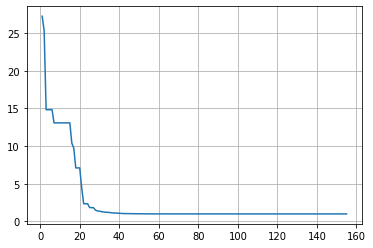


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 295, 'max_turn': 155, 'w': 0.6888734018877114, 'c1': 0.6217629577975344, 'c2': 0.17278676849738156}
gb_place : [ 7.60757955e-06 -9.94805647e-01 -6.20905512e-05  8.77370273e-06
  2.61118128e-05]
gb_score : 0.994964625189418
計算時間 : 1195 ms



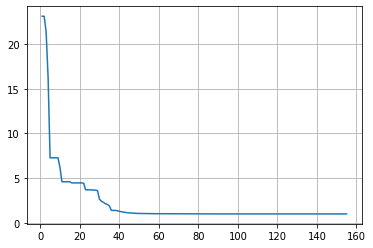


------------------------------ PSO SIMULATION START!! ------------------------------


------------------------------- 最終出力 -------------------------------
パラメータ : {'num_agent': 295, 'max_turn': 155, 'w': 0.6888734018877114, 'c1': 0.6217629577975344, 'c2': 0.17278676849738156}
gb_place : [ 9.95043036e-01 -7.65124594e-05 -9.94843986e-01 -2.52499422e-05
 -1.65307617e-04]
gb_score : 1.989928842476962
計算時間 : 1132 ms



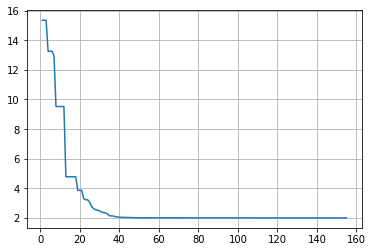

In [27]:
best_params = study.best_params
num_agent = best_params["num_agent"]
max_turn = best_params["max_turn"]
w = best_params["w"]
c1 = best_params["c1"]
c2 = best_params["c2"]

for _ in range(3) : 
    pso = PSO(N, function_number, num_agent, min_field, max_field, max_turn, 
                    w, c1, c2, output_mode = output_mode)
    plot_score(function_number, pso.gb_record_list)